In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:40821")
client

<Client: 'tcp://127.0.0.1:40821' processes=5 threads=5, memory=251.34 GiB>

In [2]:
import numpy as np
import xarray as xr
import os.path as op
import gsw
from scipy.interpolate import griddata
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/bettik/PROJECTS/pr-data-ocean/COMMON/SWOT-FSP/'
savedir = '/bettik/uchidat/SWOT/'

In [4]:
fbase = 'SWOT_L3_LR_SSH_Basic_'
fnames = [
    '541_001_20230603T113421_20230603T122526_v0.1.nc',
    '541_002_20230603T122527_20230603T131632_v0.1.nc',
    '541_003_20230603T131632_20230603T140737_v0.1.nc',
    '541_004_20230603T140738_20230603T145843_v0.1.nc',
    '541_005_20230603T145843_20230603T154949_v0.1.nc',
    '541_006_20230603T154949_20230603T164055_v0.1.nc',
    '541_007_20230603T164055_20230603T173201_v0.1.nc',
    '541_008_20230603T173201_20230603T182305_v0.1.nc',
    '541_009_20230603T182306_20230603T191411_v0.1.nc',
    '541_010_20230603T191412_20230603T200517_v0.1.nc',
    '541_011_20230603T200517_20230603T205623_v0.1.nc',
    '541_012_20230603T205623_20230603T214729_v0.1.nc',
    '541_013_20230603T214729_20230603T223835_v0.1.nc',
    '541_014_20230603T223835_20230603T232940_v0.1.nc',
    '541_015_20230603T232940_20230604T002045_v0.1.nc',
    '541_016_20230604T002046_20230604T011151_v0.1.nc',
    '541_017_20230604T011151_20230604T020256_v0.1.nc',
    '541_018_20230604T020257_20230604T025402_v0.1.nc',
    '541_019_20230604T025402_20230604T034508_v0.1.nc',
    '541_020_20230604T034508_20230604T043614_v0.1.nc',
    '541_021_20230604T043614_20230604T052720_v0.1.nc',
    '541_022_20230604T052720_20230604T061825_v0.1.nc',
    '541_023_20230604T061825_20230604T070930_v0.1.nc',
    '541_024_20230604T070931_20230604T080036_v0.1.nc',
    '541_025_20230604T080036_20230604T085141_v0.1.nc',
    '541_026_20230604T085142_20230604T094247_v0.1.nc',
    '541_027_20230604T094248_20230604T103353_v0.1.nc',
    '541_028_20230604T103354_20230604T112458_v0.1.nc',
    '542_001_20230604T112459_20230604T121604_v0.1.nc',
    '542_002_20230604T121605_20230604T130710_v0.1.nc',
    '542_003_20230604T130710_20230604T135815_v0.1.nc',
    '542_004_20230604T135816_20230604T144921_v0.1.nc',
    '542_005_20230604T144921_20230604T154027_v0.1.nc',
    '542_006_20230604T154027_20230604T163133_v0.1.nc',
    '542_007_20230604T163133_20230604T172238_v0.1.nc',
    '542_008_20230604T172238_20230604T181343_v0.1.nc',
    '542_009_20230604T181344_20230604T190449_v0.1.nc',
    '542_010_20230604T190450_20230604T195555_v0.1.nc',
    '542_011_20230604T195555_20230604T204701_v0.1.nc',
    '542_012_20230604T204701_20230604T213807_v0.1.nc',
    '542_013_20230604T213807_20230604T222913_v0.1.nc',
    '542_014_20230604T222913_20230604T232018_v0.1.nc',
    '542_015_20230604T232018_20230605T001123_v0.1.nc',
    '542_016_20230605T001124_20230605T010229_v0.1.nc',
    '542_017_20230605T010229_20230605T015334_v0.1.nc',
    '542_018_20230605T015335_20230605T024440_v0.1.nc',
    '542_019_20230605T024440_20230605T033546_v0.1.nc',
    '542_020_20230605T033546_20230605T042652_v0.1.nc',
    '542_025_20230605T075114_20230605T084219_v0.1.nc',
    '542_026_20230605T084220_20230605T093325_v0.1.nc',
    '542_027_20230605T093326_20230605T102431_v0.1.nc',
    '542_028_20230605T102432_20230605T111536_v0.1.nc',
    '543_001_20230605T111537_20230605T120642_v0.1.nc',
    '543_014_20230605T221950_20230605T231056_v0.1.nc',
    '543_015_20230605T231056_20230606T000201_v0.1.nc',
    '543_016_20230606T000202_20230606T005307_v0.1.nc',
    '543_017_20230606T005307_20230606T014412_v0.1.nc',
    '543_018_20230606T014413_20230606T023518_v0.1.nc',
    '543_019_20230606T023518_20230606T032624_v0.1.nc',
    '543_020_20230606T032624_20230606T041730_v0.1.nc',
    '543_021_20230606T041730_20230606T050835_v0.1.nc',
    '543_022_20230606T050835_20230606T055941_v0.1.nc',
    '543_023_20230606T055941_20230606T065046_v0.1.nc',
    '543_024_20230606T065047_20230606T074152_v0.1.nc',
    '543_025_20230606T074152_20230606T083257_v0.1.nc',
    '543_026_20230606T083258_20230606T092403_v0.1.nc',
    '543_027_20230606T092403_20230606T101509_v0.1.nc',
    '543_028_20230606T101509_20230606T110614_v0.1.nc',
    '544_001_20230606T110615_20230606T115720_v0.1.nc',
    '544_002_20230606T115721_20230606T124826_v0.1.nc',
    '544_003_20230606T124826_20230606T133931_v0.1.nc',
    '544_004_20230606T133932_20230606T143037_v0.1.nc',
    '544_005_20230606T143037_20230606T152142_v0.1.nc',
    '544_006_20230606T152143_20230606T161248_v0.1.nc',
    '544_007_20230606T161248_20230606T170354_v0.1.nc',
    '544_008_20230606T170354_20230606T175459_v0.1.nc',
    '544_009_20230606T175500_20230606T184605_v0.1.nc',
    '544_010_20230606T184606_20230606T193710_v0.1.nc',
    '544_011_20230606T193711_20230606T202816_v0.1.nc',
    '544_012_20230606T202817_20230606T211922_v0.1.nc',
    '544_013_20230606T211922_20230606T221028_v0.1.nc',
    '544_014_20230606T221028_20230606T230134_v0.1.nc',
    '544_015_20230606T230134_20230606T235239_v0.1.nc',
    '544_016_20230606T235240_20230607T004345_v0.1.nc',
    '544_017_20230607T004345_20230607T013450_v0.1.nc',
    '544_018_20230607T013451_20230607T022556_v0.1.nc',
    '544_019_20230607T022556_20230607T031702_v0.1.nc',
    '544_020_20230607T031702_20230607T040807_v0.1.nc',
    '544_021_20230607T040807_20230607T045913_v0.1.nc',
    '544_022_20230607T045913_20230607T055019_v0.1.nc',
    '544_023_20230607T055019_20230607T064124_v0.1.nc',
    '544_024_20230607T064125_20230607T073230_v0.1.nc',
    '544_025_20230607T073230_20230607T082335_v0.1.nc',
    '544_026_20230607T082336_20230607T091441_v0.1.nc',
    '544_027_20230607T091441_20230607T100546_v0.1.nc',
    '544_028_20230607T100547_20230607T105652_v0.1.nc',
    '545_001_20230607T105653_20230607T114758_v0.1.nc',
    '545_002_20230607T114759_20230607T123904_v0.1.nc',
    '545_003_20230607T123904_20230607T133009_v0.1.nc',
    '545_004_20230607T133010_20230607T142115_v0.1.nc',
    '545_005_20230607T142115_20230607T151220_v0.1.nc',
    '545_006_20230607T151221_20230607T160326_v0.1.nc',
    '545_008_20230607T165432_20230607T174537_v0.1.nc',
    '545_009_20230607T174538_20230607T183643_v0.1.nc',
    '545_010_20230607T183644_20230607T192748_v0.1.nc',
    '545_011_20230607T192749_20230607T201854_v0.1.nc',
    '545_012_20230607T201855_20230607T211000_v0.1.nc',
    '545_013_20230607T211000_20230607T220106_v0.1.nc',
    '545_014_20230607T220106_20230607T225212_v0.1.nc',
    '545_015_20230607T225212_20230607T234317_v0.1.nc',
    '545_016_20230607T234318_20230608T003423_v0.1.nc',
    '545_017_20230608T003423_20230608T012528_v0.1.nc',
    '545_018_20230608T012529_20230608T021634_v0.1.nc',
    '545_019_20230608T021634_20230608T030740_v0.1.nc',
    '545_020_20230608T030740_20230608T035845_v0.1.nc',
    '545_021_20230608T035845_20230608T044951_v0.1.nc',
    '545_022_20230608T044951_20230608T054057_v0.1.nc',
    '545_023_20230608T054057_20230608T063202_v0.1.nc',
    '545_024_20230608T063203_20230608T072308_v0.1.nc',
    '545_025_20230608T072308_20230608T081413_v0.1.nc',
    '545_026_20230608T081414_20230608T090518_v0.1.nc',
    '545_027_20230608T090519_20230608T095624_v0.1.nc',
    '545_028_20230608T095625_20230608T104730_v0.1.nc',
    '546_001_20230608T104730_20230608T113836_v0.1.nc',
    '546_002_20230608T113836_20230608T122942_v0.1.nc',
    '546_003_20230608T122942_20230608T132047_v0.1.nc',
    '546_004_20230608T132048_20230608T141153_v0.1.nc',
    '546_005_20230608T141153_20230608T150258_v0.1.nc',
    '546_006_20230608T150259_20230608T155404_v0.1.nc',
    '546_007_20230608T155404_20230608T164510_v0.1.nc',
    '546_008_20230608T164510_20230608T173615_v0.1.nc',
    '546_009_20230608T173615_20230608T182721_v0.1.nc',
    '546_010_20230608T182721_20230608T191826_v0.1.nc',
    '546_011_20230608T191827_20230608T200932_v0.1.nc',
    '546_012_20230608T200933_20230608T210038_v0.1.nc',
    '546_013_20230608T210038_20230608T215144_v0.1.nc',
    '546_014_20230608T215144_20230608T224249_v0.1.nc',
    '546_015_20230608T224249_20230608T233355_v0.1.nc',
    '546_016_20230608T233355_20230609T002501_v0.1.nc',
    '546_017_20230609T002501_20230609T011606_v0.1.nc',
    '546_018_20230609T011607_20230609T020712_v0.1.nc',
    '546_019_20230609T020712_20230609T025818_v0.1.nc',
    '546_020_20230609T025818_20230609T034923_v0.1.nc',
    '546_021_20230609T034923_20230609T044029_v0.1.nc',
    '546_022_20230609T044029_20230609T053134_v0.1.nc',
    '546_024_20230609T062240_20230609T071346_v0.1.nc',
    '546_025_20230609T071346_20230609T080451_v0.1.nc',
    '546_026_20230609T080452_20230609T085556_v0.1.nc',
    '546_027_20230609T085557_20230609T094702_v0.1.nc',
    '546_028_20230609T094703_20230609T103808_v0.1.nc',
    '547_001_20230609T103808_20230609T112913_v0.1.nc',
    '547_002_20230609T112914_20230609T122020_v0.1.nc',
    '547_003_20230609T122020_20230609T131125_v0.1.nc',
    '547_004_20230609T131125_20230609T140231_v0.1.nc',
    '547_005_20230609T140231_20230609T145336_v0.1.nc',
    '547_006_20230609T145337_20230609T154442_v0.1.nc',
    '547_007_20230609T154442_20230609T163548_v0.1.nc',
    '547_008_20230609T163548_20230609T172652_v0.1.nc',
    '547_009_20230609T172653_20230609T181758_v0.1.nc',
    '547_010_20230609T181759_20230609T190904_v0.1.nc',
    '547_011_20230609T190905_20230609T200010_v0.1.nc',
    '547_012_20230609T200011_20230609T205116_v0.1.nc',
    '547_013_20230609T205116_20230609T214222_v0.1.nc',
    '547_014_20230609T214222_20230609T223327_v0.1.nc',
    '547_015_20230609T223327_20230609T232432_v0.1.nc',
    '547_016_20230609T232433_20230610T001538_v0.1.nc',
    '547_017_20230610T001538_20230610T010644_v0.1.nc',
    '547_018_20230610T010644_20230610T015750_v0.1.nc',
    '547_019_20230610T015750_20230610T024855_v0.1.nc',
    '547_020_20230610T024855_20230610T034001_v0.1.nc',
    '547_021_20230610T034001_20230610T043107_v0.1.nc',
    '547_022_20230610T043107_20230610T052212_v0.1.nc',
    '547_023_20230610T052212_20230610T061317_v0.1.nc',
    '547_024_20230610T061318_20230610T070423_v0.1.nc',
    '547_025_20230610T070423_20230610T075529_v0.1.nc',
    '547_026_20230610T075529_20230610T084634_v0.1.nc',
    '547_027_20230610T084635_20230610T093740_v0.1.nc',
    '547_028_20230610T093741_20230610T102845_v0.1.nc',
    '548_001_20230610T102846_20230610T111951_v0.1.nc',
    '548_002_20230610T111952_20230610T121057_v0.1.nc',
    '548_003_20230610T121057_20230610T130202_v0.1.nc',
    '548_004_20230610T130203_20230610T135309_v0.1.nc',
    '548_005_20230610T135309_20230610T144414_v0.1.nc',
    '548_006_20230610T144414_20230610T153520_v0.1.nc',
    '548_007_20230610T153520_20230610T162625_v0.1.nc',
    '548_008_20230610T162625_20230610T171730_v0.1.nc',
    '548_009_20230610T171731_20230610T180836_v0.1.nc',
    '548_010_20230610T180837_20230610T185942_v0.1.nc',
    '548_011_20230610T185942_20230610T195048_v0.1.nc',
    '548_012_20230610T195048_20230610T204154_v0.1.nc',
    '548_013_20230610T204154_20230610T213300_v0.1.nc',
    '548_014_20230610T213300_20230610T222405_v0.1.nc',
    '548_015_20230610T222405_20230610T231510_v0.1.nc',
    '548_016_20230610T231511_20230611T000616_v0.1.nc',
    '548_017_20230611T000616_20230611T005721_v0.1.nc',
    '548_018_20230611T005722_20230611T014827_v0.1.nc',
    '548_019_20230611T014827_20230611T023933_v0.1.nc',
    '548_020_20230611T023933_20230611T033039_v0.1.nc',
    '548_021_20230611T033039_20230611T042144_v0.1.nc',
    '548_022_20230611T042144_20230611T051250_v0.1.nc',
    '548_023_20230611T051250_20230611T060355_v0.1.nc',
    '548_024_20230611T060356_20230611T065501_v0.1.nc',
    '548_025_20230611T065501_20230611T074606_v0.1.nc',
    '548_026_20230611T074607_20230611T083712_v0.1.nc',
    '548_027_20230611T083713_20230611T092818_v0.1.nc',
    '548_028_20230611T092818_20230611T101923_v0.1.nc',
    '549_001_20230611T101924_20230611T111029_v0.1.nc',
    '549_002_20230611T111030_20230611T120135_v0.1.nc',
    '549_003_20230611T120135_20230611T125240_v0.1.nc',
    '549_004_20230611T125241_20230611T134346_v0.1.nc',
    '549_005_20230611T134346_20230611T143451_v0.1.nc',
    '549_006_20230611T143452_20230611T152557_v0.1.nc',
    '549_007_20230611T152557_20230611T161703_v0.1.nc',
    '549_008_20230611T161703_20230611T170808_v0.1.nc',
    '549_009_20230611T170809_20230611T175914_v0.1.nc',
    '549_010_20230611T175915_20230611T185020_v0.1.nc',
    '549_011_20230611T185020_20230611T194125_v0.1.nc',
    '549_012_20230611T194126_20230611T203231_v0.1.nc',
    '549_013_20230611T203231_20230611T212337_v0.1.nc',
    '549_014_20230611T212337_20230611T221443_v0.1.nc',
    '549_015_20230611T221443_20230611T230548_v0.1.nc',
    '549_016_20230611T230549_20230611T235654_v0.1.nc',
    '549_017_20230611T235654_20230612T004759_v0.1.nc',
    '549_018_20230612T004800_20230612T013905_v0.1.nc',
    '549_019_20230612T013905_20230612T023011_v0.1.nc',
    '549_020_20230612T023011_20230612T032116_v0.1.nc',
    '549_021_20230612T032116_20230612T041222_v0.1.nc',
    '549_022_20230612T041222_20230612T050328_v0.1.nc',
    '549_023_20230612T050328_20230612T055433_v0.1.nc',
    '549_024_20230612T055434_20230612T064539_v0.1.nc',
    '549_025_20230612T064539_20230612T073644_v0.1.nc',
    '549_026_20230612T073645_20230612T082750_v0.1.nc',
    '549_027_20230612T082750_20230612T091855_v0.1.nc',
    '549_028_20230612T091856_20230612T101002_v0.1.nc',
    '550_001_20230612T101002_20230612T110107_v0.1.nc',
    '550_002_20230612T110107_20230612T115213_v0.1.nc',
    '550_003_20230612T115213_20230612T124318_v0.1.nc',
    '550_004_20230612T124319_20230612T133424_v0.1.nc',
    '550_005_20230612T133424_20230612T142529_v0.1.nc',
    '550_006_20230612T142530_20230612T151635_v0.1.nc',
    '550_007_20230612T151635_20230612T160741_v0.1.nc',
    '550_008_20230612T160741_20230612T165846_v0.1.nc',
    '550_009_20230612T165846_20230612T174952_v0.1.nc',
    '550_010_20230612T174952_20230612T184058_v0.1.nc',
    '550_011_20230612T184058_20230612T193203_v0.1.nc',
    '550_012_20230612T193204_20230612T202309_v0.1.nc',
    '550_013_20230612T202309_20230612T211415_v0.1.nc',
    '550_014_20230612T211415_20230612T220520_v0.1.nc',
    '550_015_20230612T220520_20230612T225626_v0.1.nc',
    '550_016_20230612T225626_20230612T234732_v0.1.nc',
    '550_017_20230612T234732_20230613T003837_v0.1.nc',
    '551_016_20230613T224704_20230613T233809_v0.1.nc',
    '551_017_20230613T233809_20230614T002914_v0.1.nc',
    '551_018_20230614T002915_20230614T012020_v0.1.nc',
    '551_019_20230614T012020_20230614T021126_v0.1.nc',
    '551_020_20230614T021126_20230614T030232_v0.1.nc',
    '551_021_20230614T030232_20230614T035337_v0.1.nc',
    '551_022_20230614T035337_20230614T044443_v0.1.nc',
    '551_023_20230614T044443_20230614T053548_v0.1.nc',
    '551_024_20230614T053549_20230614T062654_v0.1.nc',
    '551_025_20230614T062654_20230614T071759_v0.1.nc',
    '551_026_20230614T071800_20230614T080906_v0.1.nc',
    '551_027_20230614T080906_20230614T090011_v0.1.nc',
    '551_028_20230614T090011_20230614T095117_v0.1.nc',
    '552_001_20230614T095117_20230614T104222_v0.1.nc',
    '552_002_20230614T104223_20230614T113328_v0.1.nc',
    '552_003_20230614T113328_20230614T122433_v0.1.nc',
    '552_004_20230614T122434_20230614T131539_v0.1.nc',
    '552_005_20230614T131539_20230614T140644_v0.1.nc',
    '552_006_20230614T140645_20230614T145750_v0.1.nc',
    '552_008_20230614T154856_20230614T164002_v0.1.nc',
    '552_009_20230614T164002_20230614T173107_v0.1.nc',
    '552_010_20230614T173108_20230614T182213_v0.1.nc',
    '552_011_20230614T182213_20230614T191318_v0.1.nc',
    '552_012_20230614T191319_20230614T200424_v0.1.nc',
    '552_013_20230614T200424_20230614T205530_v0.1.nc',
    '552_014_20230614T205530_20230614T214636_v0.1.nc',
    '552_015_20230614T214636_20230614T223741_v0.1.nc',
    '552_016_20230614T223742_20230614T232847_v0.1.nc',
    '552_017_20230614T232847_20230615T001952_v0.1.nc',
    '552_018_20230615T001953_20230615T011058_v0.1.nc',
    '552_019_20230615T011058_20230615T020204_v0.1.nc',
    '552_020_20230615T020204_20230615T025309_v0.1.nc',
    '552_021_20230615T025309_20230615T034415_v0.1.nc',
    '552_022_20230615T034415_20230615T043521_v0.1.nc',
    '552_023_20230615T043521_20230615T052626_v0.1.nc',
    '552_024_20230615T052627_20230615T061732_v0.1.nc',
    '552_025_20230615T061732_20230615T070837_v0.1.nc',
    '553_002_20230615T103300_20230615T112406_v0.1.nc',
    '553_003_20230615T112406_20230615T121511_v0.1.nc',
    '553_004_20230615T121512_20230615T130617_v0.1.nc',
    '553_006_20230615T135723_20230615T144828_v0.1.nc',
    '553_007_20230615T144828_20230615T153934_v0.1.nc',
    '553_008_20230615T153934_20230615T163039_v0.1.nc',
    '553_009_20230615T163039_20230615T172145_v0.1.nc',
    '553_010_20230615T172145_20230615T181251_v0.1.nc',
    '553_011_20230615T181251_20230615T190356_v0.1.nc',
    '553_012_20230615T190357_20230615T195502_v0.1.nc',
    '553_013_20230615T195502_20230615T204608_v0.1.nc',
    '553_014_20230615T204608_20230615T213713_v0.1.nc',
    '553_015_20230615T213713_20230615T222819_v0.1.nc',
    '553_016_20230615T222819_20230615T231925_v0.1.nc',
    '553_017_20230615T231925_20230616T001030_v0.1.nc',
    '553_018_20230616T001031_20230616T010136_v0.1.nc',
    '553_019_20230616T010136_20230616T015242_v0.1.nc',
    '553_020_20230616T015242_20230616T024347_v0.1.nc',
    '553_021_20230616T024347_20230616T033453_v0.1.nc',
    '553_022_20230616T033453_20230616T042558_v0.1.nc',
    '553_023_20230616T042558_20230616T051703_v0.1.nc',
    '553_024_20230616T051704_20230616T060810_v0.1.nc',
    '553_025_20230616T060810_20230616T065915_v0.1.nc',
    '553_026_20230616T065915_20230616T075021_v0.1.nc',
    '553_027_20230616T075021_20230616T084126_v0.1.nc',
    '553_028_20230616T084127_20230616T093232_v0.1.nc',
    '554_001_20230616T093232_20230616T102337_v0.1.nc',
    '554_002_20230616T102338_20230616T111443_v0.1.nc',
    '554_003_20230616T111443_20230616T120548_v0.1.nc',
    '554_004_20230616T120549_20230616T125655_v0.1.nc',
    '554_005_20230616T125655_20230616T134800_v0.1.nc',
    '554_006_20230616T134800_20230616T143906_v0.1.nc',
    '554_007_20230616T143906_20230616T153011_v0.1.nc',
    '554_008_20230616T153011_20230616T162117_v0.1.nc',
    '554_009_20230616T162117_20230616T171222_v0.1.nc',
    '554_010_20230616T171223_20230616T180328_v0.1.nc',
    '554_011_20230616T180328_20230616T185434_v0.1.nc',
    '554_016_20230616T221857_20230616T231002_v0.1.nc',
    '554_017_20230616T231002_20230617T000107_v0.1.nc',
    '554_018_20230617T000108_20230617T005213_v0.1.nc',
    '554_019_20230617T005213_20230617T014319_v0.1.nc',
    '554_020_20230617T014319_20230617T023425_v0.1.nc',
    '554_021_20230617T023425_20230617T032531_v0.1.nc',
    '554_022_20230617T032531_20230617T041636_v0.1.nc',
    '554_023_20230617T041636_20230617T050741_v0.1.nc',
    '554_024_20230617T050742_20230617T055847_v0.1.nc',
    '554_025_20230617T055847_20230617T064952_v0.1.nc',
    '554_026_20230617T064953_20230617T074059_v0.1.nc',
    '554_027_20230617T074059_20230617T083204_v0.1.nc',
    '554_028_20230617T083205_20230617T092310_v0.1.nc',
    '555_001_20230617T092310_20230617T101415_v0.1.nc',
    '555_002_20230617T101416_20230617T110521_v0.1.nc',
    '555_003_20230617T110521_20230617T115626_v0.1.nc',
    '555_004_20230617T115627_20230617T124733_v0.1.nc',
    '555_005_20230617T124733_20230617T133838_v0.1.nc',
    '555_006_20230617T133838_20230617T142944_v0.1.nc',
    '555_007_20230617T142944_20230617T152050_v0.1.nc',
    '555_008_20230617T152050_20230617T161155_v0.1.nc',
    '555_009_20230617T161155_20230617T170300_v0.1.nc',
    '555_010_20230617T170301_20230617T175406_v0.1.nc',
    '555_011_20230617T175406_20230617T184512_v0.1.nc',
    '555_012_20230617T184513_20230617T193618_v0.1.nc',
    '555_013_20230617T193618_20230617T202724_v0.1.nc',
    '555_014_20230617T202724_20230617T211829_v0.1.nc',
    '555_015_20230617T211829_20230617T220934_v0.1.nc',
    '555_016_20230617T220935_20230617T230040_v0.1.nc',
    '555_017_20230617T230040_20230617T235146_v0.1.nc',
    '555_018_20230617T235146_20230618T004252_v0.1.nc',
    '555_019_20230618T004252_20230618T013357_v0.1.nc',
    '555_020_20230618T013357_20230618T022503_v0.1.nc',
    '555_021_20230618T022503_20230618T031609_v0.1.nc',
    '555_022_20230618T031609_20230618T040714_v0.1.nc',
    '555_023_20230618T040714_20230618T045819_v0.1.nc',
    '555_024_20230618T045820_20230618T054926_v0.1.nc',
    '555_025_20230618T054926_20230618T064031_v0.1.nc',
    '555_026_20230618T064031_20230618T073137_v0.1.nc',
    '555_027_20230618T073137_20230618T082242_v0.1.nc',
    '555_028_20230618T082243_20230618T091348_v0.1.nc',
    '556_001_20230618T091348_20230618T100453_v0.1.nc',
    '556_002_20230618T100454_20230618T105559_v0.1.nc',
    '556_003_20230618T105559_20230618T114705_v0.1.nc',
    '556_004_20230618T114705_20230618T123811_v0.1.nc',
    '556_005_20230618T123811_20230618T132916_v0.1.nc',
    '556_006_20230618T132917_20230618T142022_v0.1.nc',
    '556_007_20230618T142022_20230618T151128_v0.1.nc',
    '556_008_20230618T151128_20230618T160233_v0.1.nc',
    '556_009_20230618T160233_20230618T165338_v0.1.nc',
    '556_010_20230618T165339_20230618T174445_v0.1.nc',
    '556_011_20230618T174445_20230618T183550_v0.1.nc',
    '556_012_20230618T183551_20230618T192656_v0.1.nc',
    '556_013_20230618T192656_20230618T201802_v0.1.nc',
    '556_014_20230618T201802_20230618T210907_v0.1.nc',
    '556_015_20230618T210907_20230618T220012_v0.1.nc',
    '556_016_20230618T220013_20230618T225119_v0.1.nc',
    '556_017_20230618T225119_20230618T234224_v0.1.nc',
    '556_018_20230618T234225_20230619T003330_v0.1.nc',
    '556_019_20230619T003330_20230619T012436_v0.1.nc',
    '556_020_20230619T012436_20230619T021541_v0.1.nc',
    '556_021_20230619T021541_20230619T030647_v0.1.nc',
    '556_022_20230619T030647_20230619T035752_v0.1.nc',
    '556_023_20230619T035752_20230619T044857_v0.1.nc',
    '556_024_20230619T044858_20230619T054004_v0.1.nc',
    '556_025_20230619T054004_20230619T063109_v0.1.nc',
    '556_026_20230619T063110_20230619T072215_v0.1.nc',
    '556_027_20230619T072215_20230619T081320_v0.1.nc',
    '556_028_20230619T081321_20230619T090426_v0.1.nc',
    '557_001_20230619T090426_20230619T095531_v0.1.nc',
    '557_002_20230619T095532_20230619T104638_v0.1.nc',
    '557_003_20230619T104638_20230619T113743_v0.1.nc',
    '557_004_20230619T113743_20230619T122849_v0.1.nc',
    '557_005_20230619T122849_20230619T131954_v0.1.nc',
    '557_006_20230619T131955_20230619T141100_v0.1.nc',
    '557_007_20230619T141100_20230619T150206_v0.1.nc',
    '557_008_20230619T150206_20230619T155311_v0.1.nc',
    '557_009_20230619T155311_20230619T164417_v0.1.nc',
    '557_010_20230619T164417_20230619T173523_v0.1.nc',
    '557_011_20230619T173523_20230619T182628_v0.1.nc',
    '557_012_20230619T182629_20230619T191734_v0.1.nc',
    '557_013_20230619T191734_20230619T200840_v0.1.nc',
    '557_014_20230619T200840_20230619T205945_v0.1.nc',
    '557_015_20230619T205945_20230619T215051_v0.1.nc',
    '557_016_20230619T215051_20230619T224157_v0.1.nc',
    '557_017_20230619T224157_20230619T233302_v0.1.nc',
    '557_018_20230619T233303_20230620T002408_v0.1.nc',
    '557_019_20230620T002408_20230620T011514_v0.1.nc',
    '557_020_20230620T011514_20230620T020619_v0.1.nc',
    '557_021_20230620T020619_20230620T025725_v0.1.nc',
    '557_022_20230620T025725_20230620T034830_v0.1.nc',
    '557_023_20230620T034830_20230620T043936_v0.1.nc',
    '557_024_20230620T043936_20230620T053042_v0.1.nc',
    '557_025_20230620T053042_20230620T062147_v0.1.nc',
    '557_026_20230620T062148_20230620T071253_v0.1.nc',
    '557_027_20230620T071253_20230620T080358_v0.1.nc',
    '558_007_20230620T140138_20230620T145244_v0.1.nc',
    '558_008_20230620T145244_20230620T154349_v0.1.nc',
    '558_009_20230620T154349_20230620T163455_v0.1.nc',
    '558_010_20230620T163455_20230620T172601_v0.1.nc',
    '558_011_20230620T172601_20230620T181706_v0.1.nc',
    '558_012_20230620T181707_20230620T190812_v0.1.nc',
    '558_013_20230620T190812_20230620T195918_v0.1.nc',
    '558_014_20230620T195918_20230620T205023_v0.1.nc',
    '558_015_20230620T205023_20230620T214129_v0.1.nc',
    '558_016_20230620T214129_20230620T223235_v0.1.nc',
    '558_017_20230620T223235_20230620T232340_v0.1.nc',
    '558_018_20230620T232341_20230621T001446_v0.1.nc',
    '559_001_20230621T084542_20230621T093648_v0.1.nc',
    '559_002_20230621T093648_20230621T102754_v0.1.nc',
    '559_003_20230621T102754_20230621T111859_v0.1.nc',
    '559_004_20230621T111900_20230621T121005_v0.1.nc',
    '559_005_20230621T121005_20230621T130110_v0.1.nc',
    '559_006_20230621T130111_20230621T135216_v0.1.nc',
    '559_007_20230621T135216_20230621T144322_v0.1.nc',
    '559_008_20230621T144322_20230621T153427_v0.1.nc',
    '559_009_20230621T153427_20230621T162533_v0.1.nc',
    '559_010_20230621T162533_20230621T171639_v0.1.nc',
    '559_011_20230621T171639_20230621T180744_v0.1.nc',
    '559_012_20230621T180745_20230621T185850_v0.1.nc',
    '559_013_20230621T185850_20230621T194956_v0.1.nc',
    '559_014_20230621T194956_20230621T204102_v0.1.nc',
    '559_015_20230621T204102_20230621T213207_v0.1.nc',
    '559_016_20230621T213208_20230621T222313_v0.1.nc',
    '559_017_20230621T222313_20230621T231418_v0.1.nc',
    '559_018_20230621T231419_20230622T000524_v0.1.nc',
    '559_019_20230622T000524_20230622T005630_v0.1.nc',
    '559_020_20230622T005630_20230622T014735_v0.1.nc',
    '559_021_20230622T014735_20230622T023841_v0.1.nc',
    '559_022_20230622T023841_20230622T032946_v0.1.nc',
    '559_023_20230622T032946_20230622T042052_v0.1.nc',
    '559_024_20230622T042052_20230622T051158_v0.1.nc',
    '559_025_20230622T051158_20230622T060303_v0.1.nc',
    '559_026_20230622T060304_20230622T065409_v0.1.nc',
    '559_027_20230622T065409_20230622T074514_v0.1.nc',
    '559_028_20230622T074515_20230622T083620_v0.1.nc',
    '560_001_20230622T083620_20230622T092726_v0.1.nc',
    '560_003_20230622T101832_20230622T110937_v0.1.nc',
    '560_004_20230622T110938_20230622T120043_v0.1.nc',
    '560_006_20230622T125149_20230622T134254_v0.1.nc',
    '560_007_20230622T134254_20230622T143400_v0.1.nc',
    '560_008_20230622T143400_20230622T152505_v0.1.nc',
    '560_009_20230622T152505_20230622T161611_v0.1.nc',
    '560_010_20230622T161612_20230622T170717_v0.1.nc',
    '560_011_20230622T170717_20230622T175822_v0.1.nc',
    '560_012_20230622T175823_20230622T184928_v0.1.nc',
    '560_013_20230622T184928_20230622T194034_v0.1.nc',
    '560_014_20230622T194034_20230622T203140_v0.1.nc',
    '560_015_20230622T203140_20230622T212245_v0.1.nc',
    '560_016_20230622T212246_20230622T221351_v0.1.nc',
    '560_017_20230622T221351_20230622T230456_v0.1.nc',
    '560_018_20230622T230457_20230622T235602_v0.1.nc',
    '560_019_20230622T235602_20230623T004708_v0.1.nc',
    '560_020_20230623T004708_20230623T013813_v0.1.nc',
    '560_021_20230623T013813_20230623T022919_v0.1.nc',
    '560_022_20230623T022919_20230623T032024_v0.1.nc',
    '560_023_20230623T032024_20230623T041130_v0.1.nc',
    '560_024_20230623T041130_20230623T050236_v0.1.nc',
    '560_025_20230623T050236_20230623T055341_v0.1.nc',
    '560_026_20230623T055342_20230623T064447_v0.1.nc',
    '560_027_20230623T064447_20230623T073552_v0.1.nc',
    '560_028_20230623T073553_20230623T082658_v0.1.nc',
    '561_001_20230623T082658_20230623T091804_v0.1.nc',
    '561_002_20230623T091804_20230623T100910_v0.1.nc',
    '561_003_20230623T100910_20230623T110015_v0.1.nc',
    '561_004_20230623T110016_20230623T115121_v0.1.nc',
    '561_006_20230623T124227_20230623T133332_v0.1.nc',
    '561_007_20230623T133332_20230623T142438_v0.1.nc',
    '561_008_20230623T142438_20230623T151543_v0.1.nc',
    '561_009_20230623T151543_20230623T160649_v0.1.nc',
    '561_010_20230623T160649_20230623T165755_v0.1.nc',
    '561_011_20230623T165755_20230623T174900_v0.1.nc',
    '561_012_20230623T174901_20230623T184006_v0.1.nc',
    '561_013_20230623T184006_20230623T193112_v0.1.nc',
    '561_014_20230623T193112_20230623T202217_v0.1.nc',
    '561_015_20230623T202217_20230623T211323_v0.1.nc',
    '561_016_20230623T211323_20230623T220429_v0.1.nc',
    '561_017_20230623T220429_20230623T225534_v0.1.nc',
    '561_018_20230623T225535_20230623T234640_v0.1.nc',
    '561_019_20230623T234640_20230624T003746_v0.1.nc',
    '562_015_20230624T201255_20230624T210401_v0.1.nc',
    '562_016_20230624T210401_20230624T215507_v0.1.nc',
    '562_017_20230624T215507_20230624T224612_v0.1.nc',
    '562_018_20230624T224613_20230624T233718_v0.1.nc',
    '562_019_20230624T233718_20230625T002824_v0.1.nc',
    '562_020_20230625T002824_20230625T011929_v0.1.nc',
    '562_021_20230625T011929_20230625T021035_v0.1.nc',
    '562_022_20230625T021035_20230625T030140_v0.1.nc',
    '562_024_20230625T035246_20230625T044352_v0.1.nc',
    '562_025_20230625T044352_20230625T053457_v0.1.nc',
    '562_026_20230625T053458_20230625T062602_v0.1.nc',
    '562_027_20230625T062603_20230625T071708_v0.1.nc',
    '562_028_20230625T071709_20230625T080814_v0.1.nc',
    '563_001_20230625T080814_20230625T085919_v0.1.nc',
    '563_002_20230625T085920_20230625T095026_v0.1.nc',
    '563_003_20230625T095026_20230625T104131_v0.1.nc',
    '563_004_20230625T104131_20230625T113237_v0.1.nc',
    '563_005_20230625T113237_20230625T122342_v0.1.nc',
    '563_006_20230625T122343_20230625T131448_v0.1.nc',
    '563_007_20230625T131448_20230625T140554_v0.1.nc',
    '563_008_20230625T140554_20230625T145659_v0.1.nc',
    '563_009_20230625T145659_20230625T154804_v0.1.nc',
    '563_010_20230625T154805_20230625T163910_v0.1.nc',
    '563_011_20230625T163911_20230625T173016_v0.1.nc',
    '563_012_20230625T173017_20230625T182122_v0.1.nc',
    '563_013_20230625T182122_20230625T191228_v0.1.nc',
    '563_014_20230625T191228_20230625T200333_v0.1.nc',
    '563_015_20230625T200333_20230625T205438_v0.1.nc',
    '563_016_20230625T205439_20230625T214545_v0.1.nc',
    '563_017_20230625T214545_20230625T223650_v0.1.nc',
    '563_018_20230625T223650_20230625T232756_v0.1.nc',
    '563_019_20230625T232756_20230626T001902_v0.1.nc',
    '563_020_20230626T001902_20230626T011007_v0.1.nc',
    '563_021_20230626T011007_20230626T020113_v0.1.nc',
    '563_022_20230626T020113_20230626T025218_v0.1.nc',
    '563_023_20230626T025218_20230626T034323_v0.1.nc',
    '563_024_20230626T034324_20230626T043430_v0.1.nc',
    '563_025_20230626T043430_20230626T052535_v0.1.nc',
    '563_026_20230626T052536_20230626T061640_v0.1.nc',
    '563_027_20230626T061641_20230626T070746_v0.1.nc',
    '563_028_20230626T070747_20230626T075852_v0.1.nc',
    '564_001_20230626T075852_20230626T084957_v0.1.nc',
    '564_002_20230626T084958_20230626T094104_v0.1.nc',
    '564_003_20230626T094104_20230626T103209_v0.1.nc',
    '564_004_20230626T103209_20230626T112315_v0.1.nc',
    '564_005_20230626T112315_20230626T121420_v0.1.nc',
    '564_006_20230626T121421_20230626T130526_v0.1.nc',
    '564_007_20230626T130526_20230626T135632_v0.1.nc',
    '564_008_20230626T135632_20230626T144736_v0.1.nc',
    '564_009_20230626T144737_20230626T153842_v0.1.nc',
    '564_010_20230626T153843_20230626T162948_v0.1.nc',
    '564_011_20230626T162949_20230626T172054_v0.1.nc',
    '564_012_20230626T172055_20230626T181200_v0.1.nc',
    '564_013_20230626T181200_20230626T190306_v0.1.nc',
    '564_014_20230626T190306_20230626T195411_v0.1.nc',
    '564_015_20230626T195411_20230626T204516_v0.1.nc',
    '564_016_20230626T204517_20230626T213622_v0.1.nc',
    '564_017_20230626T213622_20230626T222728_v0.1.nc',
    '564_018_20230626T222728_20230626T231834_v0.1.nc',
    '564_019_20230626T231834_20230627T000939_v0.1.nc',
    '564_020_20230627T000939_20230627T010045_v0.1.nc',
    '565_011_20230627T162026_20230627T171132_v0.1.nc',
    '565_012_20230627T171132_20230627T180238_v0.1.nc',
    '565_013_20230627T180238_20230627T185344_v0.1.nc',
    '565_014_20230627T185344_20230627T194449_v0.1.nc',
    '565_015_20230627T194449_20230627T203554_v0.1.nc',
    '565_016_20230627T203555_20230627T212700_v0.1.nc',
    '565_018_20230627T221806_20230627T230911_v0.1.nc',
    '565_019_20230627T230911_20230628T000017_v0.1.nc',
    '565_020_20230628T000017_20230628T005123_v0.1.nc',
    '565_021_20230628T005123_20230628T014228_v0.1.nc',
    '565_022_20230628T014228_20230628T023334_v0.1.nc',
    '565_023_20230628T023334_20230628T032439_v0.1.nc',
    '565_024_20230628T032440_20230628T041545_v0.1.nc',
    '565_025_20230628T041545_20230628T050650_v0.1.nc',
    '565_026_20230628T050651_20230628T055756_v0.1.nc',
    '565_027_20230628T055757_20230628T064902_v0.1.nc',
    '565_028_20230628T064903_20230628T074007_v0.1.nc',
    '566_005_20230628T110430_20230628T115535_v0.1.nc',
    '566_006_20230628T115536_20230628T124642_v0.1.nc',
    '566_007_20230628T124642_20230628T133747_v0.1.nc',
    '566_008_20230628T133747_20230628T142852_v0.1.nc',
    '566_009_20230628T142853_20230628T151958_v0.1.nc',
    '566_010_20230628T151959_20230628T161104_v0.1.nc',
    '566_011_20230628T161104_20230628T170209_v0.1.nc',
    '566_012_20230628T170210_20230628T175316_v0.1.nc',
    '566_013_20230628T175316_20230628T184421_v0.1.nc',
    '566_014_20230628T184421_20230628T193527_v0.1.nc',
    '566_015_20230628T193527_20230628T202632_v0.1.nc',
    '566_016_20230628T202633_20230628T211738_v0.1.nc',
    '566_017_20230628T211738_20230628T220843_v0.1.nc',
    '566_021_20230629T004201_20230629T013306_v0.1.nc',
    '566_022_20230629T013306_20230629T022412_v0.1.nc',
    '566_023_20230629T022412_20230629T031517_v0.1.nc',
    '566_024_20230629T031518_20230629T040623_v0.1.nc',
    '566_025_20230629T040623_20230629T045728_v0.1.nc',
    '566_026_20230629T045729_20230629T054834_v0.1.nc',
    '566_027_20230629T054834_20230629T063939_v0.1.nc',
    '566_028_20230629T063940_20230629T073045_v0.1.nc',
    '567_001_20230629T073046_20230629T082151_v0.1.nc',
    '567_002_20230629T082152_20230629T091257_v0.1.nc',
    '567_003_20230629T091257_20230629T100402_v0.1.nc',
    '567_004_20230629T100403_20230629T105508_v0.1.nc',
    '567_005_20230629T105508_20230629T114613_v0.1.nc',
    '567_006_20230629T114614_20230629T123719_v0.1.nc',
    '567_008_20230629T132825_20230629T141930_v0.1.nc',
    '567_009_20230629T141931_20230629T151036_v0.1.nc',
    '567_010_20230629T151037_20230629T160141_v0.1.nc',
    '567_011_20230629T160142_20230629T165247_v0.1.nc',
    '567_012_20230629T165248_20230629T174353_v0.1.nc',
    '567_013_20230629T174353_20230629T183459_v0.1.nc',
    '567_014_20230629T183459_20230629T192605_v0.1.nc',
    '567_015_20230629T192605_20230629T201710_v0.1.nc',
    '567_016_20230629T201711_20230629T210816_v0.1.nc',
    '567_018_20230629T215922_20230629T225027_v0.1.nc',
    '567_019_20230629T225027_20230629T234133_v0.1.nc',
    '567_020_20230629T234133_20230630T003238_v0.1.nc',
    '567_021_20230630T003238_20230630T012344_v0.1.nc',
    '567_022_20230630T012344_20230630T021450_v0.1.nc',
    '567_023_20230630T021450_20230630T030555_v0.1.nc',
    '567_024_20230630T030555_20230630T035701_v0.1.nc',
    '567_025_20230630T035701_20230630T044806_v0.1.nc',
    '567_026_20230630T044807_20230630T053912_v0.1.nc',
    '567_027_20230630T053912_20230630T063017_v0.1.nc',
    '567_028_20230630T063018_20230630T072123_v0.1.nc',
    '568_005_20230630T104546_20230630T113651_v0.1.nc',
    '568_007_20230630T122757_20230630T131903_v0.1.nc',
    '568_008_20230630T131903_20230630T141008_v0.1.nc',
    '568_009_20230630T141008_20230630T150114_v0.1.nc',
    '568_010_20230630T150114_20230630T155219_v0.1.nc',
    '568_011_20230630T155220_20230630T164325_v0.1.nc',
    '568_012_20230630T164326_20230630T173431_v0.1.nc',
    '568_013_20230630T173431_20230630T182537_v0.1.nc',
    '568_018_20230630T214959_20230630T224105_v0.1.nc',
    '568_019_20230630T224105_20230630T233211_v0.1.nc',
    '568_020_20230630T233211_20230701T002316_v0.1.nc',
    '568_021_20230701T002316_20230701T011422_v0.1.nc',
    '568_022_20230701T011422_20230701T020527_v0.1.nc',
    '568_023_20230701T020527_20230701T025633_v0.1.nc',
    '568_024_20230701T025633_20230701T034739_v0.1.nc',
    '568_027_20230701T052950_20230701T062055_v0.1.nc',
    '569_004_20230701T094519_20230701T103624_v0.1.nc',
    '569_005_20230701T103624_20230701T112729_v0.1.nc',
    '569_006_20230701T112730_20230701T121835_v0.1.nc',
    '569_007_20230701T121835_20230701T130941_v0.1.nc',
    '569_008_20230701T130941_20230701T140046_v0.1.nc',
    '569_009_20230701T140046_20230701T145152_v0.1.nc',
    '569_010_20230701T145152_20230701T154257_v0.1.nc',
    '569_011_20230701T154258_20230701T163403_v0.1.nc',
    '569_012_20230701T163404_20230701T172509_v0.1.nc',
    '569_013_20230701T172509_20230701T181615_v0.1.nc',
    '569_014_20230701T181615_20230701T190721_v0.1.nc',
    '569_015_20230701T190721_20230701T195826_v0.1.nc',
    '569_016_20230701T195826_20230701T204932_v0.1.nc',
    '569_017_20230701T204932_20230701T214037_v0.1.nc',
    '569_018_20230701T214038_20230701T223143_v0.1.nc',
    '569_019_20230701T223143_20230701T232249_v0.1.nc',
    '569_020_20230701T232249_20230702T001354_v0.1.nc',
    '569_021_20230702T001354_20230702T010500_v0.1.nc',
    '569_022_20230702T010500_20230702T015605_v0.1.nc',
    '569_023_20230702T015605_20230702T024711_v0.1.nc',
    '569_024_20230702T024711_20230702T033817_v0.1.nc',
    '569_025_20230702T033817_20230702T042922_v0.1.nc',
    '569_026_20230702T042923_20230702T052028_v0.1.nc',
    '569_027_20230702T052028_20230702T061133_v0.1.nc',
    '569_028_20230702T061134_20230702T070239_v0.1.nc',
    '570_001_20230702T070240_20230702T075345_v0.1.nc',
    '570_002_20230702T075345_20230702T084451_v0.1.nc',
    '570_003_20230702T084451_20230702T093556_v0.1.nc',
    '570_004_20230702T093557_20230702T102702_v0.1.nc',
    '570_005_20230702T102702_20230702T111807_v0.1.nc',
    '570_006_20230702T111808_20230702T120913_v0.1.nc',
    '570_007_20230702T120913_20230702T130019_v0.1.nc',
    '570_008_20230702T130019_20230702T135124_v0.1.nc',
    '570_009_20230702T135125_20230702T144230_v0.1.nc',
    '570_010_20230702T144231_20230702T153335_v0.1.nc',
    '570_011_20230702T153336_20230702T162441_v0.1.nc',
    '570_012_20230702T162442_20230702T171547_v0.1.nc',
    '570_013_20230702T171547_20230702T180653_v0.1.nc',
    '570_014_20230702T180653_20230702T185759_v0.1.nc',
    '570_015_20230702T185759_20230702T194904_v0.1.nc',
    '570_016_20230702T194905_20230702T204010_v0.1.nc',
    '570_019_20230702T222221_20230702T231327_v0.1.nc',
    '570_020_20230702T231327_20230703T000432_v0.1.nc',
    '570_021_20230703T000432_20230703T005538_v0.1.nc',
    '570_022_20230703T005538_20230703T014644_v0.1.nc',
    '570_023_20230703T014644_20230703T023749_v0.1.nc',
    '570_024_20230703T023749_20230703T032855_v0.1.nc',
    '570_025_20230703T032855_20230703T042000_v0.1.nc',
    '570_026_20230703T042001_20230703T051106_v0.1.nc',
    '570_027_20230703T051106_20230703T060211_v0.1.nc',
    '570_028_20230703T060212_20230703T065317_v0.1.nc',
    '571_001_20230703T065318_20230703T074423_v0.1.nc',
    '571_002_20230703T074423_20230703T083529_v0.1.nc',
    '571_003_20230703T083529_20230703T092634_v0.1.nc',
    '571_004_20230703T092635_20230703T101740_v0.1.nc',
    '571_005_20230703T101740_20230703T110845_v0.1.nc',
    '571_006_20230703T110846_20230703T115951_v0.1.nc',
    '571_007_20230703T115951_20230703T125057_v0.1.nc',
    '571_008_20230703T125057_20230703T134202_v0.1.nc',
    '571_009_20230703T134203_20230703T143308_v0.1.nc',
    '571_010_20230703T143309_20230703T152413_v0.1.nc',
    '571_011_20230703T152414_20230703T161519_v0.1.nc',
    '571_012_20230703T161520_20230703T170625_v0.1.nc',
    '571_013_20230703T170625_20230703T175731_v0.1.nc',
    '571_014_20230703T175731_20230703T184837_v0.1.nc',
    '571_015_20230703T184837_20230703T193942_v0.1.nc',
    '571_016_20230703T193943_20230703T203048_v0.1.nc',
    '571_017_20230703T203048_20230703T212153_v0.1.nc',
    '571_018_20230703T212154_20230703T221259_v0.1.nc',
    '571_019_20230703T221259_20230703T230405_v0.1.nc',
    '571_020_20230703T230405_20230703T235510_v0.1.nc',
    '571_021_20230703T235510_20230704T004616_v0.1.nc',
    '571_022_20230704T004616_20230704T013722_v0.1.nc',
    '572_017_20230704T202126_20230704T211231_v0.1.nc',
    '572_018_20230704T211232_20230704T220337_v0.1.nc',
    '572_019_20230704T220337_20230704T225443_v0.1.nc',
    '572_020_20230704T225443_20230704T234548_v0.1.nc',
    '572_021_20230704T234548_20230705T003654_v0.1.nc',
    '572_022_20230705T003654_20230705T012800_v0.1.nc',
    '572_023_20230705T012800_20230705T021905_v0.1.nc',
    '572_024_20230705T021905_20230705T031011_v0.1.nc',
    '572_025_20230705T031011_20230705T040116_v0.1.nc',
    '572_026_20230705T040117_20230705T045222_v0.1.nc',
    '573_010_20230705T141424_20230705T150529_v0.1.nc',
    '573_012_20230705T155636_20230705T164741_v0.1.nc',
    '573_013_20230705T164741_20230705T173847_v0.1.nc',
    '573_014_20230705T173847_20230705T182953_v0.1.nc',
    '573_015_20230705T182953_20230705T192058_v0.1.nc',
    '573_016_20230705T192058_20230705T201204_v0.1.nc',
    '573_017_20230705T201204_20230705T210309_v0.1.nc',
    '573_018_20230705T210310_20230705T215415_v0.1.nc',
    '573_019_20230705T215415_20230705T224521_v0.1.nc',
    '573_020_20230705T224521_20230705T233626_v0.1.nc',
    '573_021_20230705T233626_20230706T002732_v0.1.nc',
    '573_022_20230706T002732_20230706T011837_v0.1.nc',
    '573_023_20230706T011837_20230706T020943_v0.1.nc',
    '573_024_20230706T020943_20230706T030049_v0.1.nc',
    '573_028_20230706T053406_20230706T062511_v0.1.nc',
    '574_001_20230706T062511_20230706T071616_v0.1.nc',
    '574_002_20230706T071617_20230706T080723_v0.1.nc',
    '574_013_20230706T163819_20230706T172925_v0.1.nc',
    '574_014_20230706T172925_20230706T182030_v0.1.nc',
    '574_015_20230706T182030_20230706T191136_v0.1.nc',
    '574_016_20230706T191136_20230706T200242_v0.1.nc',
    '574_018_20230706T205348_20230706T214453_v0.1.nc',
    '574_019_20230706T214453_20230706T223559_v0.1.nc',
    '574_021_20230706T232704_20230707T001810_v0.1.nc',
    '574_023_20230707T010915_20230707T020020_v0.1.nc',
    '574_024_20230707T020021_20230707T025127_v0.1.nc',
    '574_025_20230707T025127_20230707T034232_v0.1.nc',
    '574_026_20230707T034233_20230707T043337_v0.1.nc',
    '574_027_20230707T043338_20230707T052443_v0.1.nc',
    '574_028_20230707T052444_20230707T061549_v0.1.nc',
    '575_001_20230707T061549_20230707T070654_v0.1.nc',
    '575_002_20230707T070655_20230707T075801_v0.1.nc',
    '575_004_20230707T084906_20230707T094012_v0.1.nc',
    '575_005_20230707T094012_20230707T103117_v0.1.nc',
    '575_006_20230707T103118_20230707T112223_v0.1.nc',
    '575_007_20230707T112223_20230707T121329_v0.1.nc',
    '575_008_20230707T121329_20230707T130434_v0.1.nc',
    '575_009_20230707T130434_20230707T135539_v0.1.nc',
    '575_010_20230707T135540_20230707T144645_v0.1.nc',
    '575_011_20230707T144646_20230707T153751_v0.1.nc',
    '575_012_20230707T153752_20230707T162857_v0.1.nc',
    '575_013_20230707T162857_20230707T172003_v0.1.nc',
    '575_014_20230707T172003_20230707T181108_v0.1.nc',
    '575_015_20230707T181108_20230707T190213_v0.1.nc',
    '575_016_20230707T190214_20230707T195320_v0.1.nc',
    '575_017_20230707T195320_20230707T204425_v0.1.nc',
    '575_018_20230707T204425_20230707T213531_v0.1.nc',
    '575_019_20230707T213531_20230707T222636_v0.1.nc',
    '575_020_20230707T222636_20230707T231742_v0.1.nc',
    '575_021_20230707T231742_20230708T000848_v0.1.nc',
    '575_022_20230708T000848_20230708T005953_v0.1.nc',
    '575_023_20230708T005953_20230708T015058_v0.1.nc',
    '575_024_20230708T015059_20230708T024205_v0.1.nc',
    '575_025_20230708T024205_20230708T033310_v0.1.nc',
    '576_002_20230708T065733_20230708T074839_v0.1.nc',
    '576_014_20230708T171041_20230708T180146_v0.1.nc',
    '576_017_20230708T194357_20230708T203503_v0.1.nc',
    '576_020_20230708T221714_20230708T230820_v0.1.nc',
    '576_021_20230708T230820_20230708T235926_v0.1.nc',
    '576_022_20230708T235926_20230709T005031_v0.1.nc',
    '576_023_20230709T005031_20230709T014136_v0.1.nc',
    '576_024_20230709T014137_20230709T023242_v0.1.nc',
    '576_025_20230709T023242_20230709T032348_v0.1.nc',
    '576_026_20230709T032348_20230709T041453_v0.1.nc',
    '576_027_20230709T041454_20230709T050559_v0.1.nc',
    '576_028_20230709T050600_20230709T055704_v0.1.nc',
    '577_001_20230709T055705_20230709T064810_v0.1.nc',
    '577_002_20230709T064811_20230709T073916_v0.1.nc',
    '577_003_20230709T073916_20230709T083021_v0.1.nc',
    '577_004_20230709T083022_20230709T092128_v0.1.nc',
    '577_005_20230709T092128_20230709T101233_v0.1.nc',
    '577_006_20230709T101233_20230709T110339_v0.1.nc',
    '577_007_20230709T110339_20230709T115444_v0.1.nc',
    '577_008_20230709T115444_20230709T124549_v0.1.nc',
    '577_009_20230709T124550_20230709T133655_v0.1.nc',
    '577_010_20230709T133656_20230709T142801_v0.1.nc',
    '577_011_20230709T142801_20230709T151907_v0.1.nc',
    '577_012_20230709T151907_20230709T161013_v0.1.nc',
    '577_013_20230709T161013_20230709T170119_v0.1.nc',
    '577_014_20230709T170119_20230709T175224_v0.1.nc',
    '577_015_20230709T175224_20230709T184329_v0.1.nc',
    '577_016_20230709T184330_20230709T193435_v0.1.nc',
    '577_017_20230709T193435_20230709T202540_v0.1.nc',
    '577_018_20230709T202541_20230709T211646_v0.1.nc',
    '577_019_20230709T211646_20230709T220752_v0.1.nc',
    '577_020_20230709T220752_20230709T225858_v0.1.nc',
    '577_021_20230709T225858_20230709T235003_v0.1.nc',
    '577_022_20230709T235003_20230710T004109_v0.1.nc',
    '577_023_20230710T004109_20230710T013214_v0.1.nc',
    '577_024_20230710T013215_20230710T022320_v0.1.nc',
    '577_025_20230710T022320_20230710T031425_v0.1.nc',
    '577_026_20230710T031426_20230710T040531_v0.1.nc',
    '577_027_20230710T040532_20230710T045637_v0.1.nc',
    '577_028_20230710T045637_20230710T054742_v0.1.nc',
    '578_001_20230710T054743_20230710T063848_v0.1.nc',
    '578_002_20230710T063849_20230710T072954_v0.1.nc',
    '578_003_20230710T072954_20230710T082059_v0.1.nc',
    '578_004_20230710T082100_20230710T091205_v0.1.nc',
    '578_005_20230710T091205_20230710T100310_v0.1.nc',
    '578_006_20230710T100311_20230710T105417_v0.1.nc',
    '578_007_20230710T105417_20230710T114522_v0.1.nc',
    '578_008_20230710T114522_20230710T123627_v0.1.nc',
    '578_009_20230710T123628_20230710T132733_v0.1.nc',
    '578_010_20230710T132734_20230710T141839_v0.1.nc',
    '578_011_20230710T141839_20230710T150944_v0.1.nc',
    '578_012_20230710T150945_20230710T160051_v0.1.nc',
    '578_013_20230710T160051_20230710T165156_v0.1.nc',
    '578_014_20230710T165156_20230710T174302_v0.1.nc',
    '578_015_20230710T174302_20230710T183408_v0.1.nc',
    '578_018_20230710T201619_20230710T210724_v0.1.nc',
    '578_019_20230710T210724_20230710T215830_v0.1.nc',
    '578_020_20230710T215830_20230710T224936_v0.1.nc',
    '578_021_20230710T224936_20230710T234041_v0.1.nc',
         ]

In [5]:
ds = xr.open_dataset(op.join(ddir, 
            'data_L3_1day_basic/' + fbase + fnames[0])
                    )
ds

<xarray.Dataset>
Dimensions:         (num_lines: 9860, num_pixels: 69, num_nadir: 810)
Coordinates:
    latitude        (num_lines, num_pixels) float64 ...
    longitude       (num_lines, num_pixels) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables:
    time            (num_lines) datetime64[ns] ...
    mdt             (num_lines, num_pixels) float64 ...
    ssha            (num_lines, num_pixels) float64 ...
    ssha_noiseless  (num_lines, num_pixels) float64 ...
    i_num_line      (num_nadir) int16 ...
    i_num_pixel     (num_nadir) int8 ...
Attributes: (12/41)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     http://aviso.altimetry.fr
    institution:                     CNES
    license:                         http://www.aviso.altimetry.fr/fileadmin/...
    ...                              ...
    time_coverage_begin:             2023-06-03T11:34:21Z
    time_coverage_end:               2023-06-03T12:25:26Z
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              8.4e-05
    geospatial_lon_max:              359.999504

In [7]:
ds_sub = ds.where(ds.latitude>30., drop=True)
ds_sub = ds_sub.where(ds_sub.latitude<50., drop=True)
# ds_sub = ds_sub.where(ds_sub.longitude<300., drop=True)
# ds_sub = ds_sub.where(ds_sub.longitude>280., drop=True)
ds_sub

<xarray.Dataset>
Dimensions:         (num_lines: 1159, num_pixels: 69, num_nadir: 810)
Coordinates:
    latitude        (num_lines, num_pixels) float64 30.0 30.0 ... 49.99 49.98
    longitude       (num_lines, num_pixels) float64 26.8 26.82 ... 34.84 34.87
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables:
    time            (num_lines, num_pixels) datetime64[ns] 2023-06-03T12:08:3...
    mdt             (num_lines, num_pixels) float64 nan nan nan ... nan nan nan
    ssha            (num_lines, num_pixels) float64 nan nan nan ... nan nan nan
    ssha_noiseless  (num_lines, num_pixels) float64 nan nan nan ... nan nan nan
    i_num_line      (num_nadir, num_lines, num_pixels) float32 1.181e+03 ... ...
    i_num_pixel     (num_nadir, num_lines, num_pixels) float32 34.0 ... 34.0
Attributes: (12/41)
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    creator_name:                    DUACS - Data Unification and Altimeter C...
    creator_url:                     http://aviso.altimetry.fr
    institution:                     CNES
    license:                         http://www.aviso.altimetry.fr/fileadmin/...
    ...                              ...
    time_coverage_begin:             2023-06-03T11:34:21Z
    time_coverage_end:               2023-06-03T12:25:26Z
    geospatial_lat_min:              -78.272196
    geospatial_lat_max:              78.272247
    geospatial_lon_min:              8.4e-05
    geospatial_lon_max:              359.999504

/tmp/ipykernel_1178595/622255513.py:6: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax)


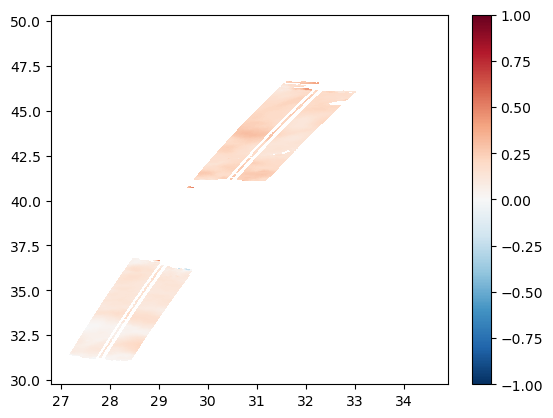

In [8]:
fig, ax = plt.subplots()
im = ax.pcolor(ds_sub.longitude, ds_sub.latitude, 
               ds_sub.ssha_noiseless, 
               vmin=-1, vmax=1,
               cmap='RdBu_r')
fig.colorbar(im, ax=ax)
# ax.set_xlim([0,360])

In [5]:
for i in range(446,len(fnames)):
# for i in range(10):
    ds = xr.open_dataset(op.join(ddir, 
                        'data_L3_1day_basic/' + fbase + fnames[i])
                        )
    
    ds_GS = ds.where(ds.latitude>30., drop=True)
    ds_GS = ds_GS.where(ds_GS.latitude<40., drop=True)
    ds_GS = ds_GS.where(ds_GS.longitude<300., drop=True)
    ds_GS = ds_GS.where(ds_GS.longitude>280., drop=True)

    if len(ds_GS.num_lines) * len(ds_GS.num_pixels) > 0.:
        ds_GS.to_zarr(op.join(savedir, 
                              'GulfStream/' + fbase + fnames[i]
                             )[:-3]
                      + '.zarr', mode='w')
    ds_GS.close()
    ds.close()
    print(i)

446
447
448
449
450
451
452
453


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


454
455
456
457
458
459
460
461
462
463
464
465
466


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


467
468
469
470
471
472
473
474
475
476
477
478
479


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


480
481
482
483
484
485
486
487
488
489
490
491
492
493


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


512
513
514
515
516
517
518
519
520
521
522
523
524
525


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


526
527
528
529
530
531
532
533
534
535
536
537
538


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


539
540
541
542
543
544
545
546
547
548
549
550
551
552
553


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


576
577
578
579
580
581
582
583
584
585
586


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


587
588
589
590
591
592
593
594
595
596


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


597
598
599
600
601
602
603
604
605
606
607
608
609
610


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


611
612
613
614
615
616
617
618
619
620
621
622


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


623
624
625
626
627
628
629
630
631
632


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


633
634
635
636
637
638
639
640
641


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


642
643
644
645
646
647
648
649
650


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


651
652
653
654
655
656
657
658
659
660
661
662
663


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


664
665
666
667
668
669
670
671
672
673
674
675
676
677
678


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


679
680
681
682
683
684
685
686
687
688
689


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


690
691
692
693
694
695
696
697
698
699
700
701
702
703
704


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


705
706
707
708
709
710
711
712
713
714
715
716
717


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


718
719
720
721
722
723


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


766
767
768
769
770
771
772
773
774
775
776
777
778


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


779
780
781
782
783
784
785
786
787


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


788
789
790
791
792
793
794
795
796
797
798
799
800
801
802


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


803
804
805
806
807
808
809
810
811
812
813
814
815


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


816
817
818
819
820
821
822
823
824
825
826
827
828
829
830


/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


831
832
833
834
835
836
837
838
839
840
841


/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


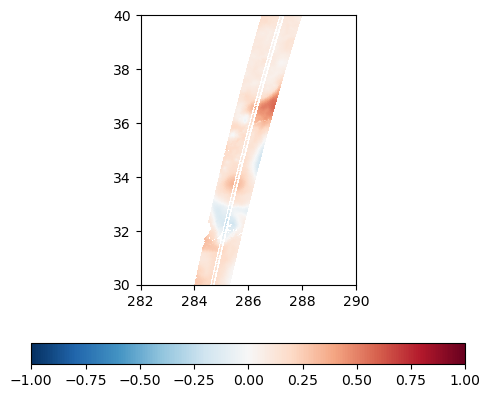

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


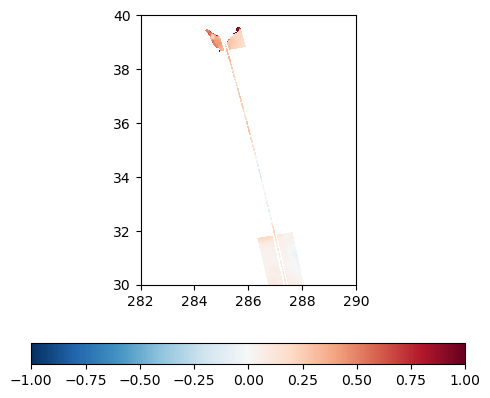

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


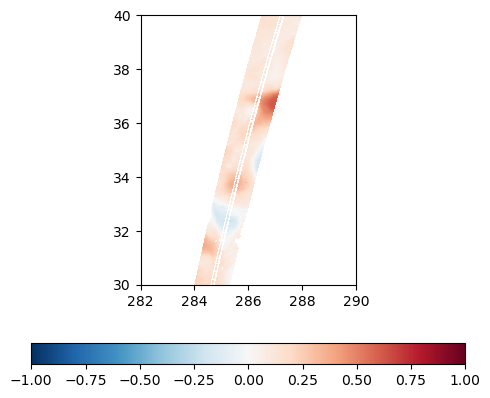

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


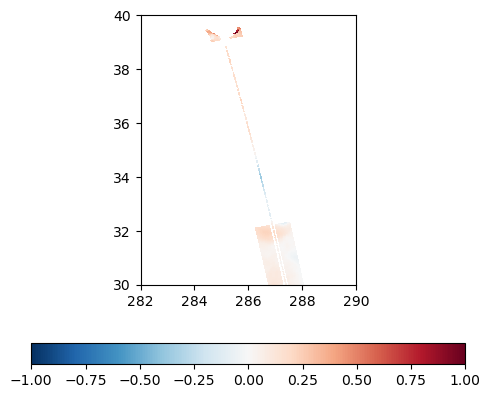

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


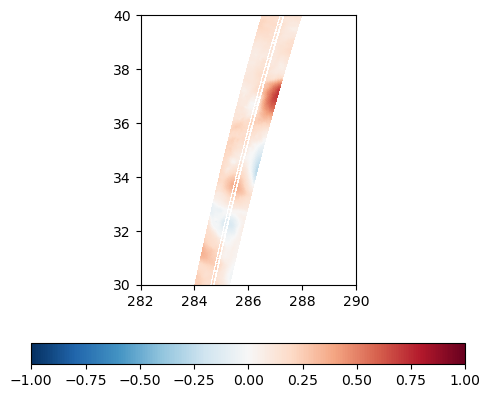

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


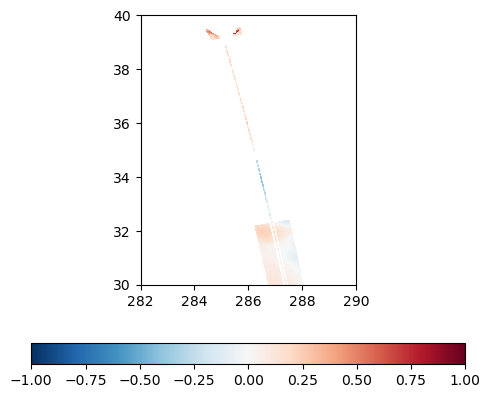

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


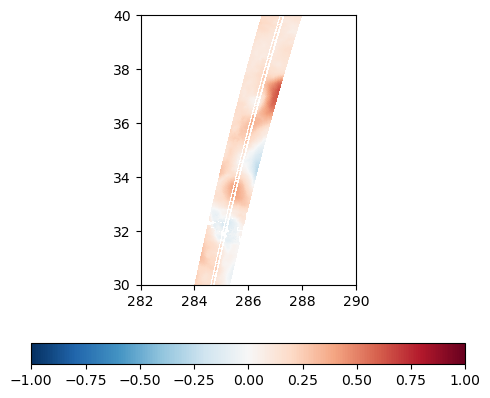

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


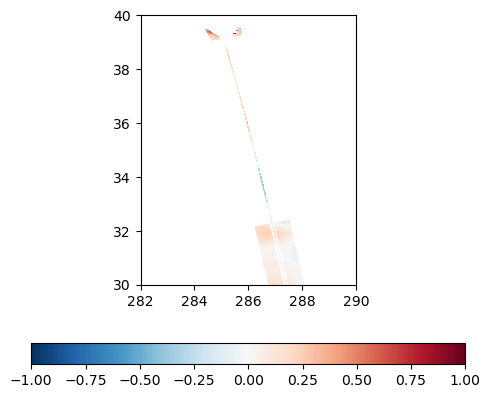

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


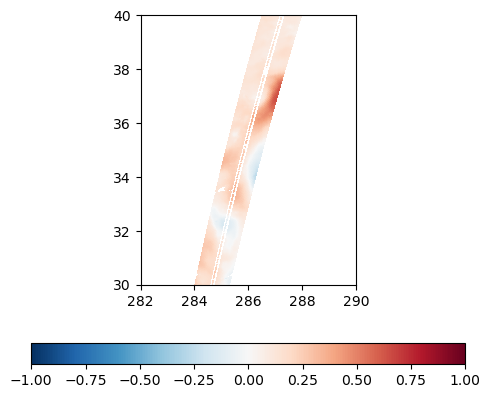

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


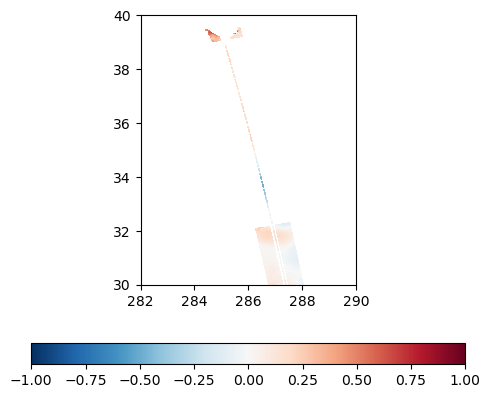

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


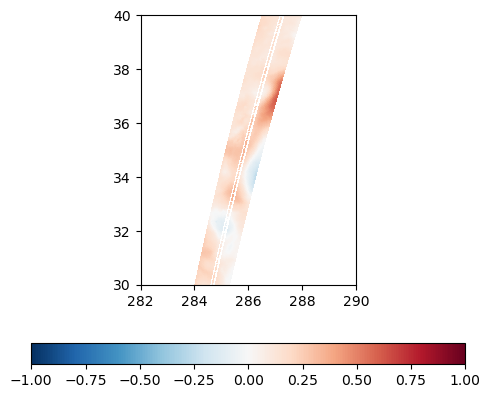

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


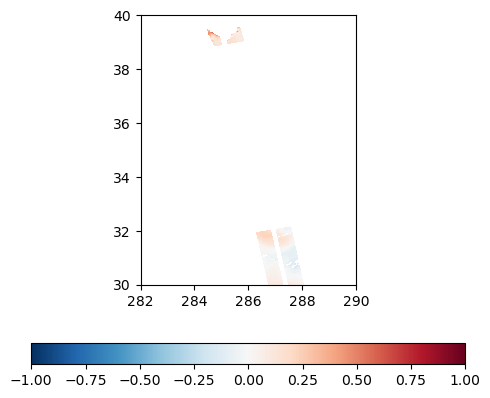

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


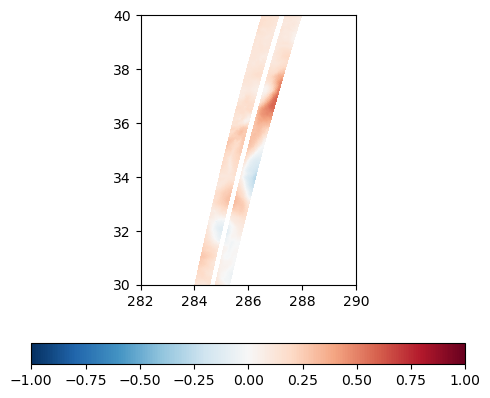

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


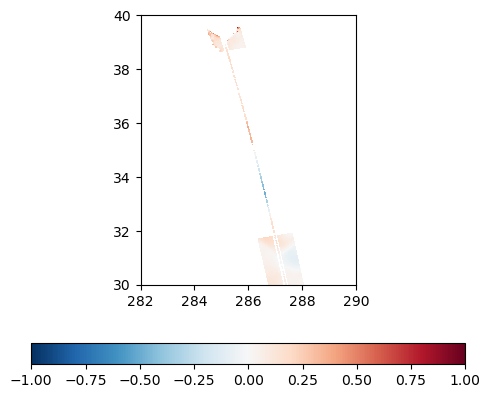

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


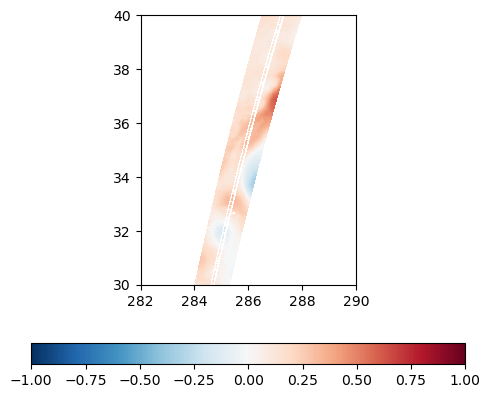

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


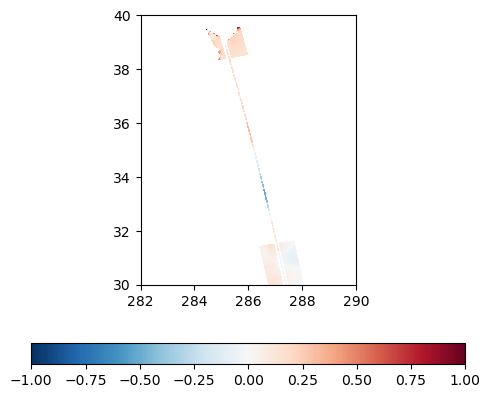

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


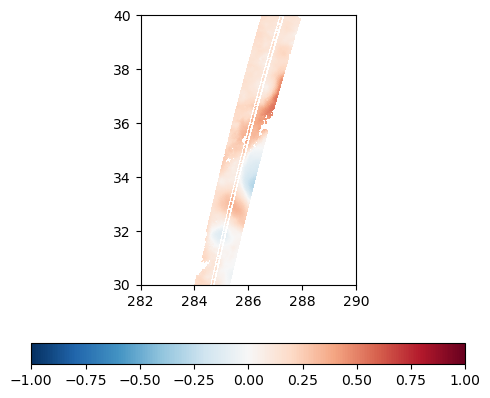

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


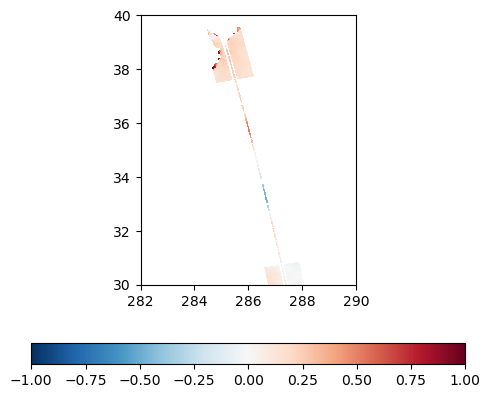

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


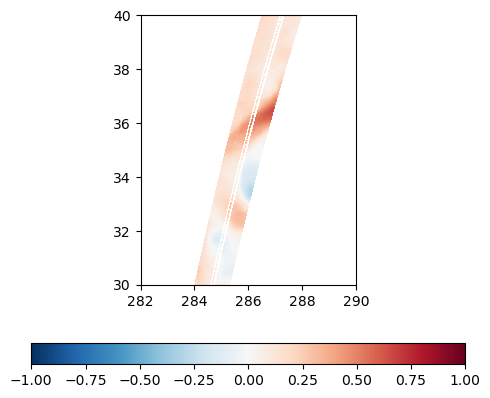

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


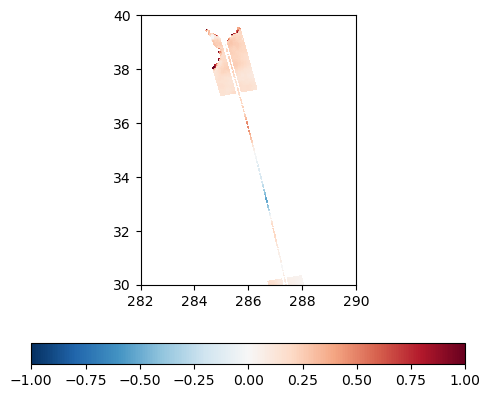

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


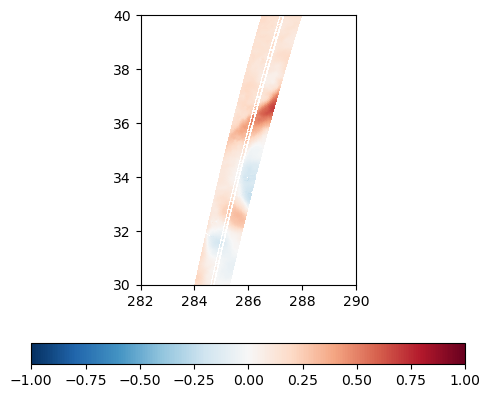

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


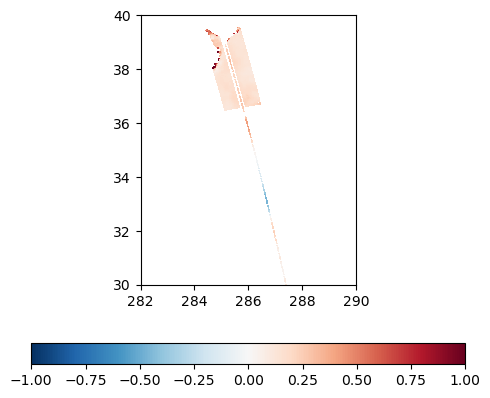

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


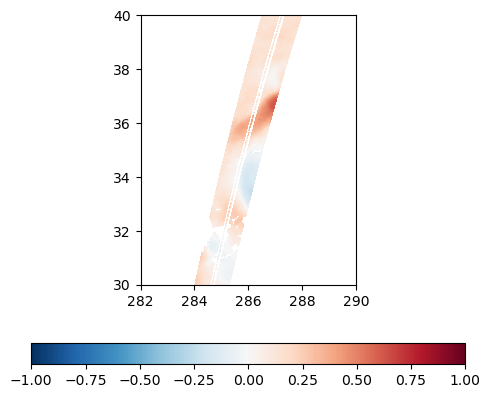

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


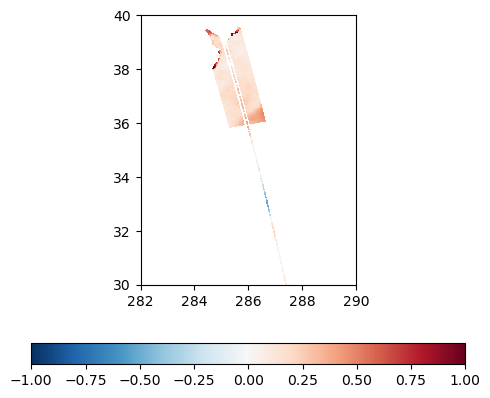

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


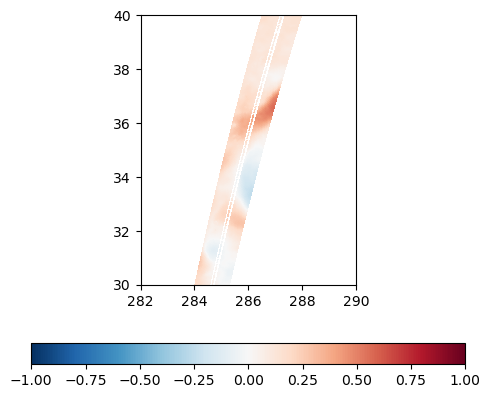

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


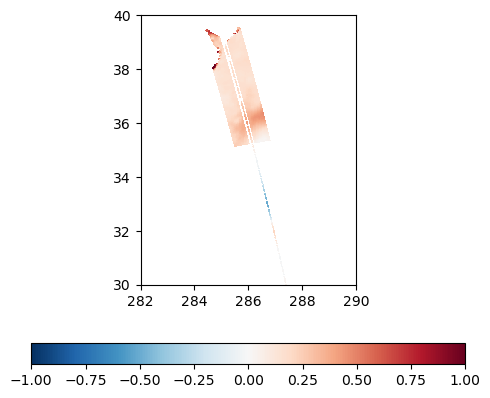

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


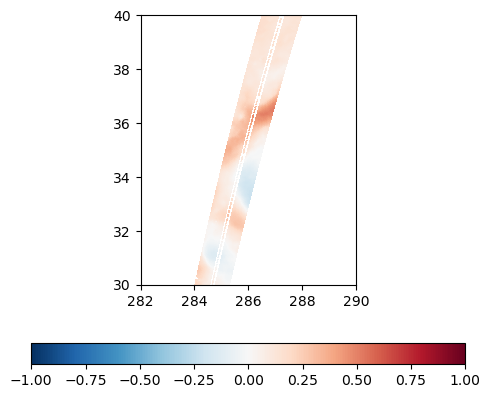

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


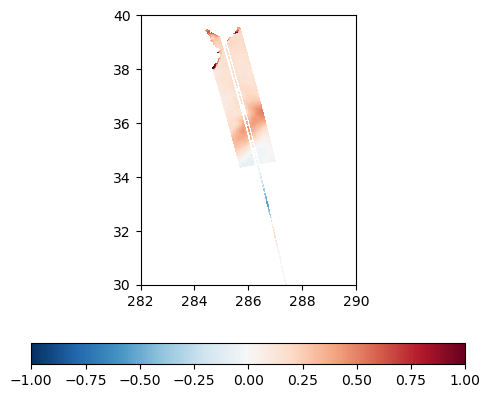

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


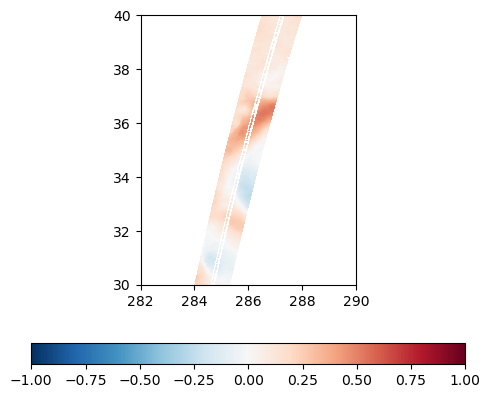

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


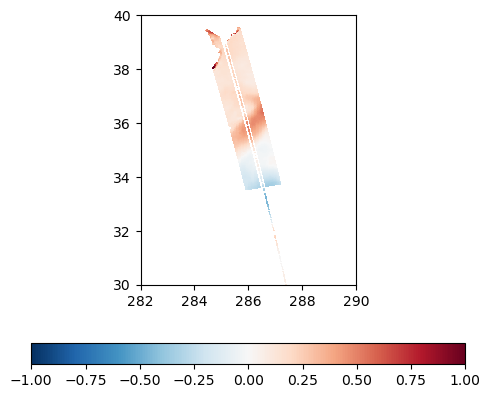

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


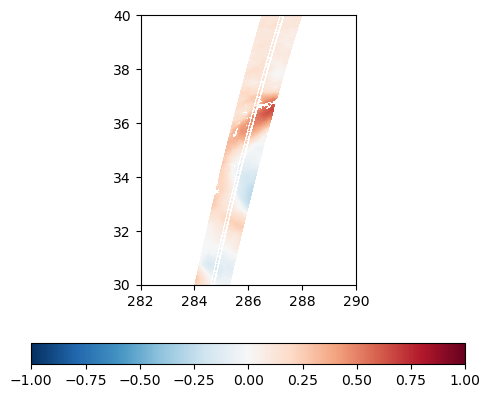

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


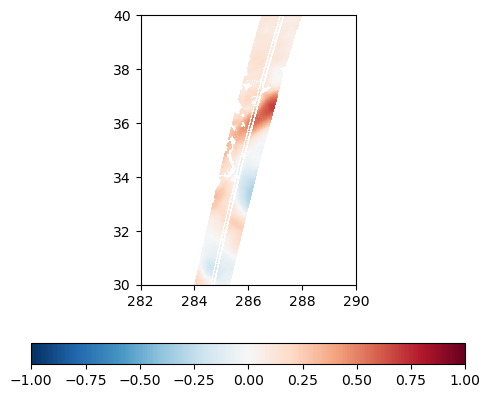

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


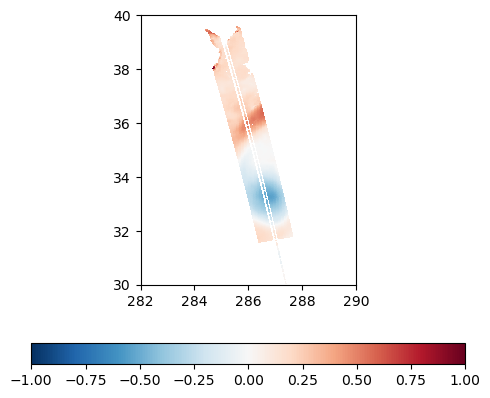

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


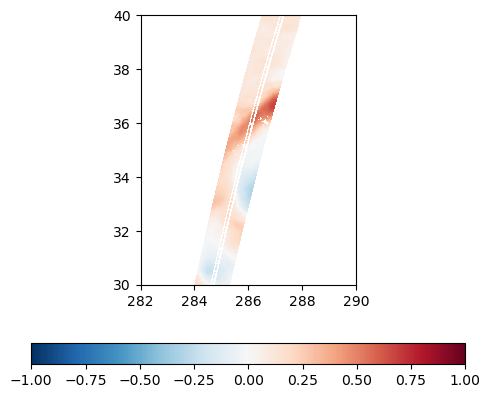

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


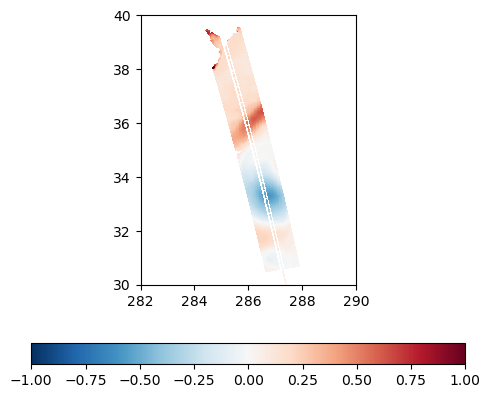

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


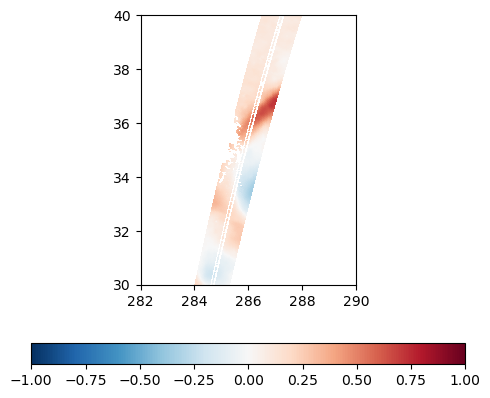

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


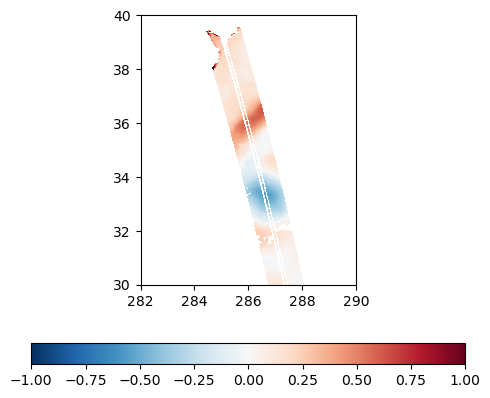

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


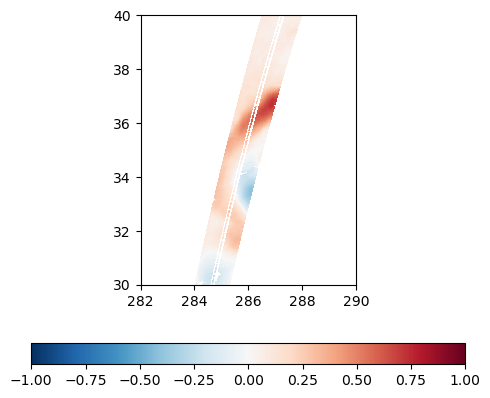

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


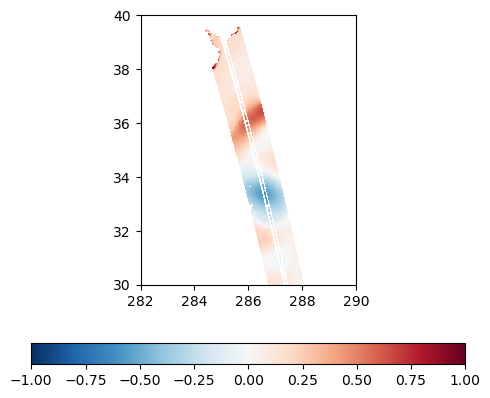

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


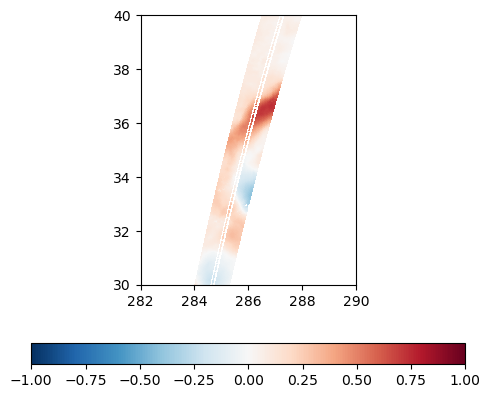

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


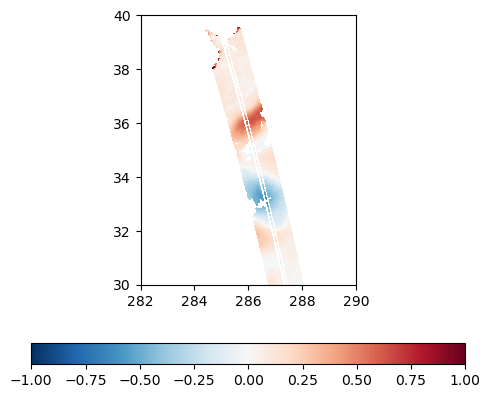

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


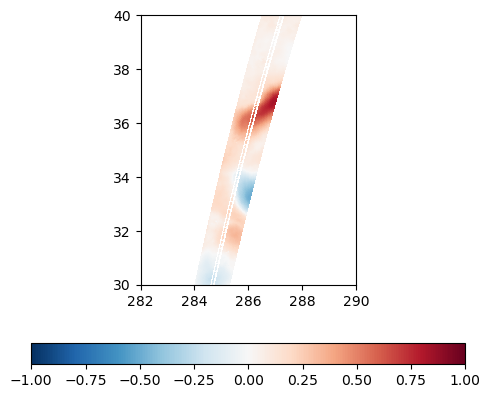

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


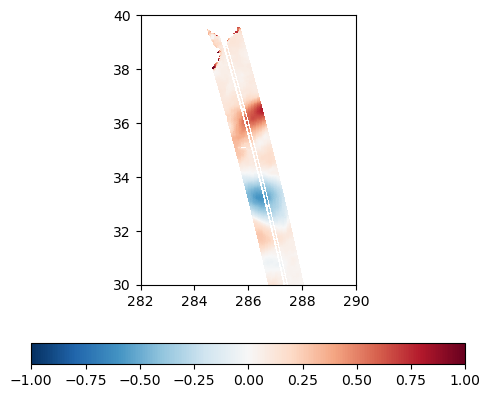

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


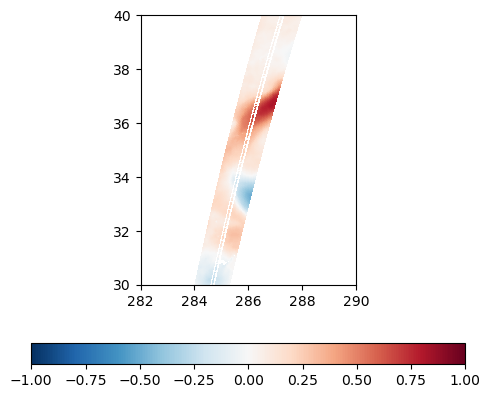

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


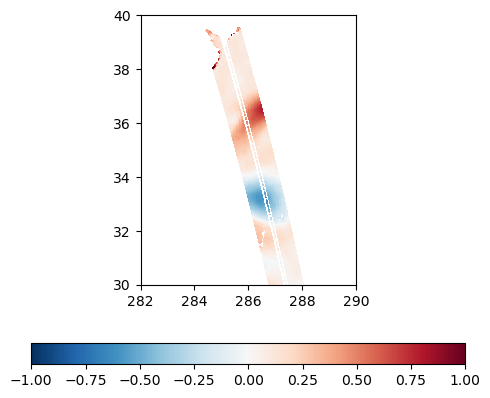

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


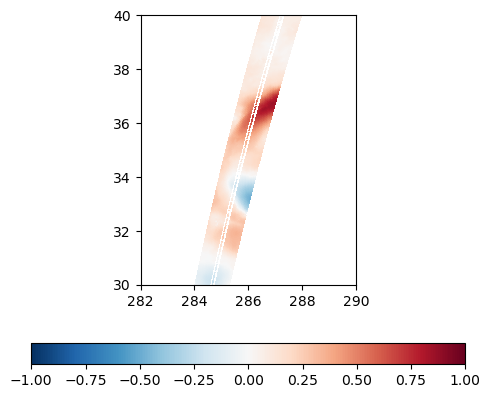

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


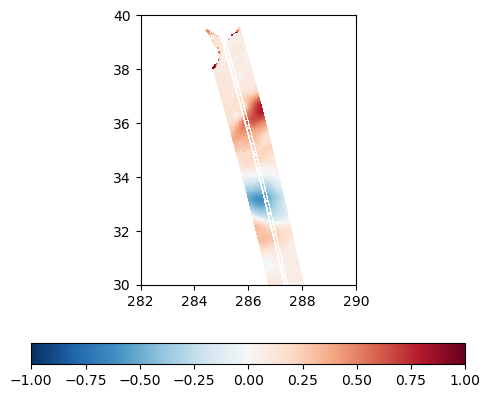

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


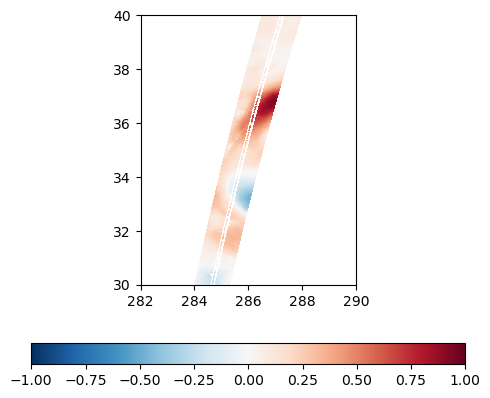

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


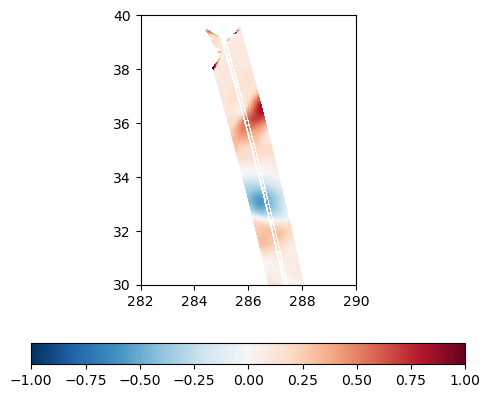

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


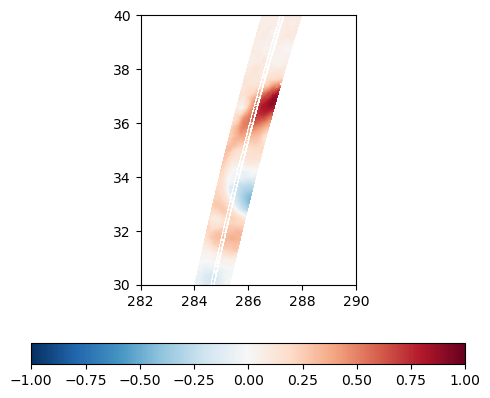

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


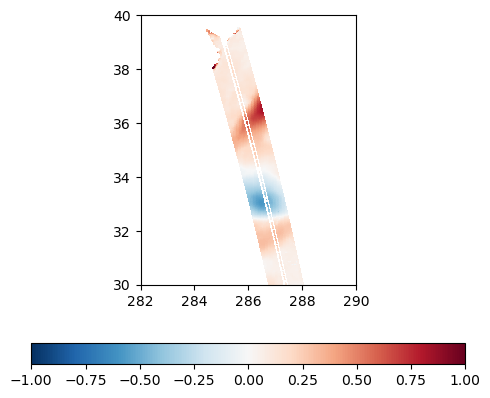

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


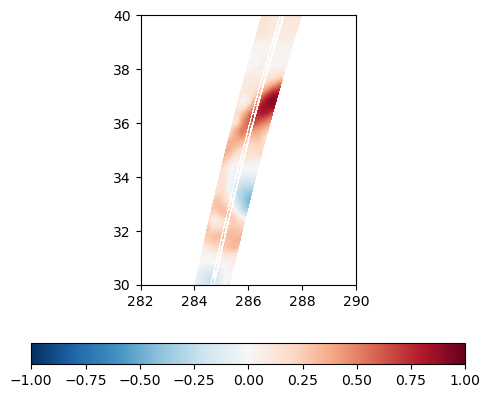

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


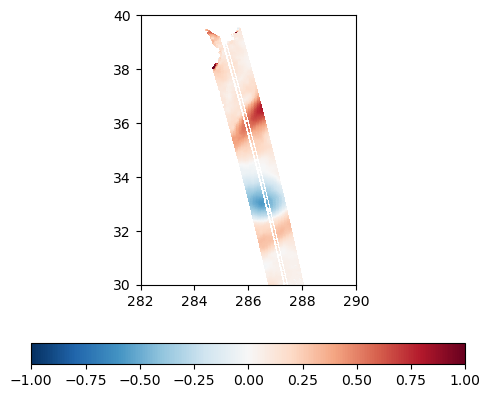

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


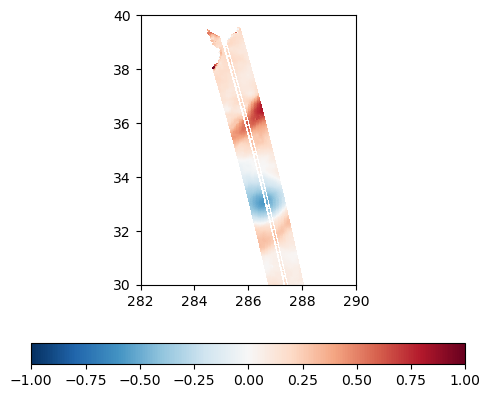

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


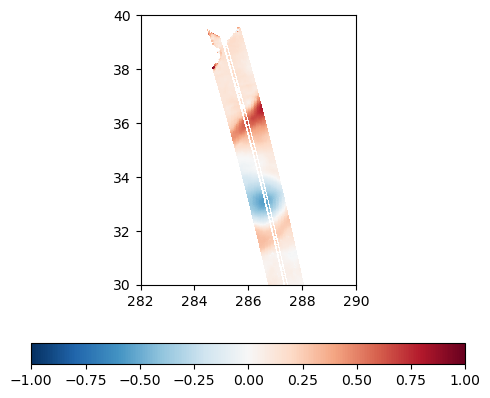

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


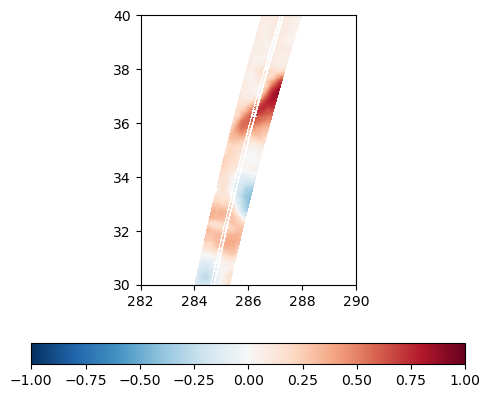

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


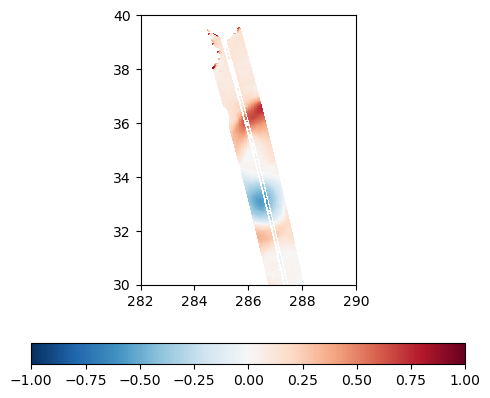

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


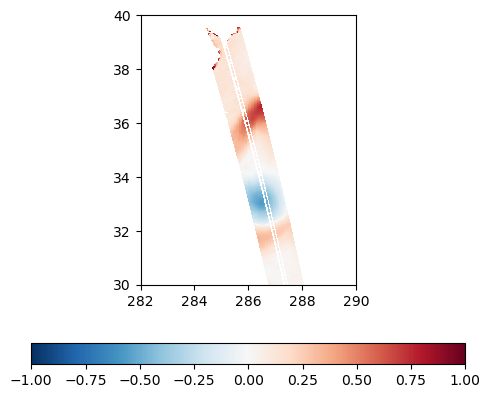

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


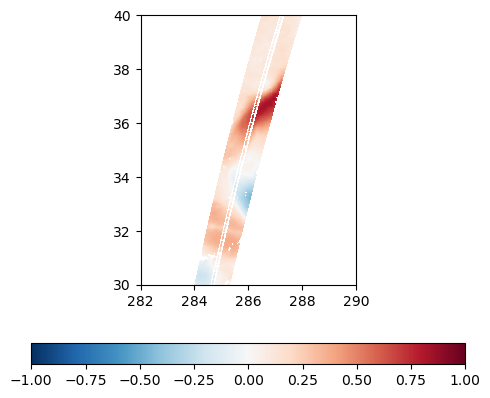

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


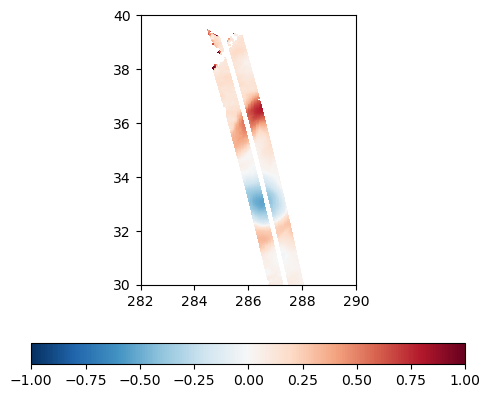

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/tmp/ipykernel_1287079/3081758048.py:32: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')


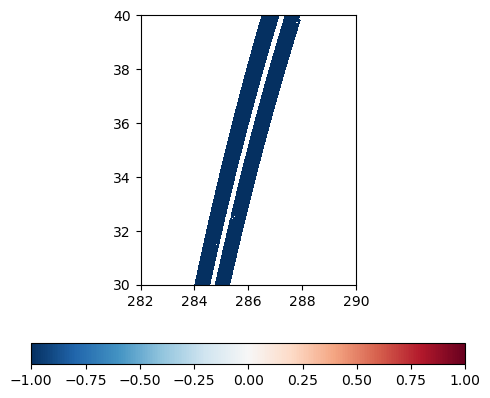

/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/home/uchidat/.conda/envs/swot/lib/python3.11/site-packages/xarray/core/dataset.py:2474: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


In [5]:
# fig = plt.figure(figsize=(11, 6))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# make the map global rather than have it zoom in to
# the extents of any plotted data
# ax.set_global()

for i in range(len(fnames)):
# for i in range(10):
    try:
        ds = xr.open_zarr(op.join(savedir, 
                'GulfStream/' + fbase + fnames[i]
                                    )[:-3]
                             + '.zarr'
                         )
        
        # ds_GS = ds.where(ds.latitude>30., drop=True)
        # ds_GS = ds_GS.where(ds_GS.latitude<50., drop=True)
        # ds_GS = ds_GS.where(ds_GS.longitude<300., drop=True)
        # ds_GS = ds_GS.where(ds_GS.longitude>280., drop=True)
    
        if len(ds.num_lines) * len(ds.num_pixels) > 0.:
            fig, ax = plt.subplots(figsize=(8,5))
            im = ax.pcolor(ds.longitude, ds.latitude, 
                       ds.ssha_noiseless, 
                       vmin=-1, vmax=1,
                       cmap='RdBu_r',
                       rasterized=True)
            ax.set_xlim([282,290])
            ax.set_ylim([30,40])
            ax.set_aspect('equal')
            fig.colorbar(im, ax=ax, shrink=.7, orientation='horizontal')
            plt.show()
            # ds.to_zarr(op.join(savedir, 
            #                       'GulfStream/' + fbase + fnames[i]
            #                      )[:-3]
            #               + '_filled.zarr', mode='w')
        ds.close()
    except

# ax.stock_img()
# ax.add_feature(cfeature.LAND, color='grey')
# ax.coastlines(lw=1, resolution='110m')
# ax.gridlines()

In [5]:
ds = xr.open_zarr(op.join(savedir, 
                'GulfStream/' + fbase + fnames[21])[:-3]
                             + '.zarr'
                 )
ds

<xarray.Dataset>
Dimensions:         (num_nadir: 785, num_lines: 582, num_pixels: 69)
Coordinates:
    latitude        (num_lines, num_pixels) float64 dask.array<chunksize=(582, 69), meta=np.ndarray>
    longitude       (num_lines, num_pixels) float64 dask.array<chunksize=(582, 69), meta=np.ndarray>
Dimensions without coordinates: num_nadir, num_lines, num_pixels
Data variables:
    i_num_line      (num_nadir, num_lines, num_pixels) float32 dask.array<chunksize=(99, 146, 18), meta=np.ndarray>
    i_num_pixel     (num_nadir, num_lines, num_pixels) float32 dask.array<chunksize=(99, 146, 18), meta=np.ndarray>
    mdt             (num_lines, num_pixels) float64 dask.array<chunksize=(291, 69), meta=np.ndarray>
    ssha            (num_lines, num_pixels) float64 dask.array<chunksize=(291, 69), meta=np.ndarray>
    ssha_noiseless  (num_lines, num_pixels) float64 dask.array<chunksize=(291, 69), meta=np.ndarray>
    time            (num_lines, num_pixels) datetime64[ns] dask.array<chunksize=(291, 69), meta=np.ndarray>
Attributes: (12/41)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    ssalto_duacs_comment:            The reference mission used for the altim...
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    time_coverage_begin:             2023-06-04T05:27:20Z
    time_coverage_end:               2023-06-04T06:18:25Z
    time_coverage_resolution:        P1S
    title:                           NRT SWOT KaRIn & nadir Global Ocean swat...

In [10]:
ds.longitude[-1,0].values, ds.longitude[0,-1].values

(array(288.117996), array(284.002048))

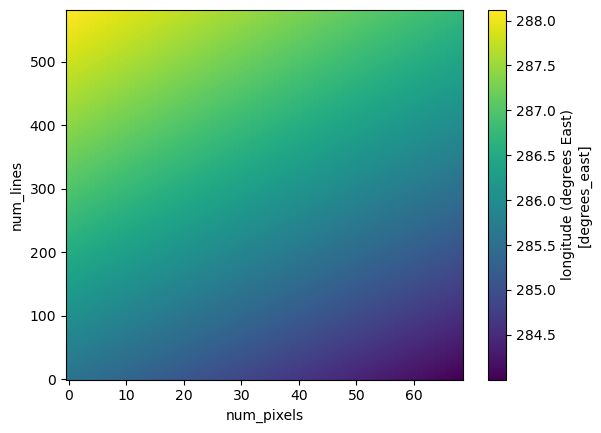

In [91]:
ds.longitude.plot()

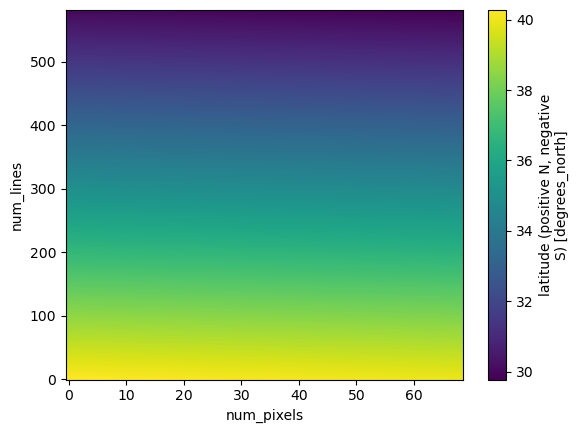

In [98]:
ds.latitude.plot()

In [8]:
yy, xx = np.mgrid[ds.latitude.max(skipna=True).values:ds.latitude.min(skipna=True).values:-np.abs(ds.latitude.diff('num_lines').min(skipna=True).values),
                  ds.longitude.max(skipna=True).values:ds.longitude.min(skipna=True).values:-np.abs(ds.longitude.diff('num_pixels').min(skipna=True).values)
                 ]
lon = griddata((ds.latitude.values.flatten(),ds.longitude.values.flatten()), ds.longitude.values.flatten(), (yy, xx), method='linear'
              )
lat = griddata((ds.latitude.values.flatten(),ds.longitude.values.flatten()), ds.latitude.values.flatten(), (yy, xx), method='linear'
              )
ssh = griddata((ds.latitude.values.flatten(),ds.longitude.values.flatten()), ds.ssha_noiseless.values.flatten(), (yy, xx), method='linear'
              )
lat

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/tmp/ipykernel_329564/3409326496.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im3 = ax3.pcolor(lon, lat, ssh, vmax=1., vmin=-1., cmap='RdBu_r'
/tmp/ipykernel_329564/3409326496.py:11: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im3, ax=ax3)


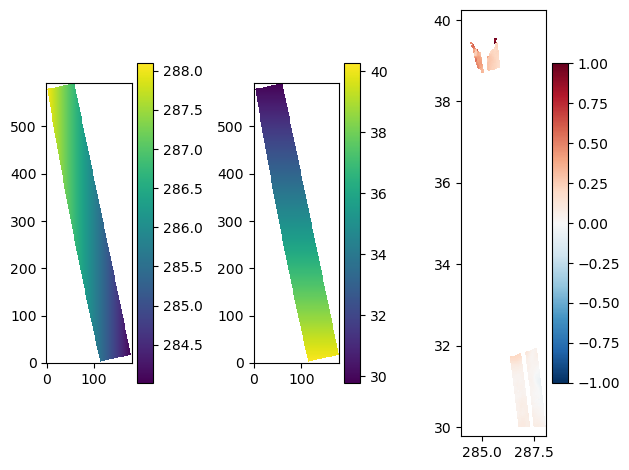

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_tight_layout(True)
im1 = ax1.imshow(lon, origin='lower' 
                )
im2 = ax2.imshow(lat, origin='lower'
                )
im3 = ax3.pcolor(lon, lat, ssh, vmax=1., vmin=-1., cmap='RdBu_r'
                )
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)

In [10]:
# dx = xr.apply_ufunc(gsw.distance, ds.longitude, ds.latitude, 0, -1,
#                     dask='parallelized', output_dtypes=np.float64
#                    )
dx = gsw.distance(lon, lat, p=0, axis=-1)
dy = gsw.distance(lon, lat, p=0, axis=0)
# cori = xr.apply_ufunc(gsw.f, ds.latitude,
#                       dask='parallelized', output_dtypes=np.float64
#                      )
cori = gsw.f(lat)
grav = 9.807
dy

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [11]:
dx.shape, dy.shape, ds.longitude.shape, ds.latitude.shape

((592, 179), (591, 180), (582, 69), (582, 69))

/tmp/ipykernel_329564/810984755.py:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im1 = ax1.pcolor(.5*(lon[:,1:] + lon[:,:-1]),
/tmp/ipykernel_329564/810984755.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im2 = ax2.pcolor(.5*(lon[1:] + lon[:-1]),
/tmp/ipykernel_329564/810984755.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, ax=ax1)
/tmp/ipykernel_329564/810984755.py:13: MatplotlibDeprecationWarning: Getti

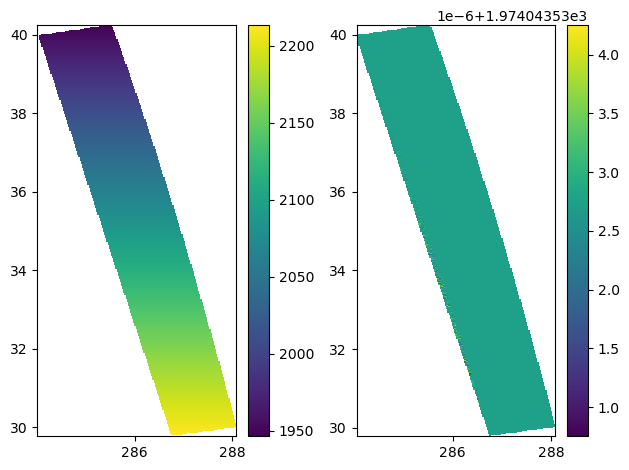

In [12]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_tight_layout(True)
im1 = ax1.pcolor(.5*(lon[:,1:] + lon[:,:-1]), 
                 .5*(lat[:,1:] + lat[:,:-1]), 
                 dx, 
                )
im2 = ax2.pcolor(.5*(lon[1:] + lon[:-1]), 
                 .5*(lat[1:] + lat[:-1]),  
                 dy, 
                )

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

In [17]:
u = -grav*np.diff(ssh,axis=0) / (.5*(cori[1:] + cori[:-1])) / dy
v = grav*np.diff(ssh,axis=1) / (.5*(cori[:,1:] + cori[:,:-1])) / dx
v

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

/tmp/ipykernel_329564/2475312351.py:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im1 = ax1.pcolor(.5*(lon[:,1:] + lon[:,:-1]),
/tmp/ipykernel_329564/2475312351.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im2 = ax2.pcolor(.5*(lon[1:] + lon[:-1]),
/tmp/ipykernel_329564/2475312351.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, ax=ax1)
/tmp/ipykernel_329564/2475312351.py:13: MatplotlibDeprecationWarning: G

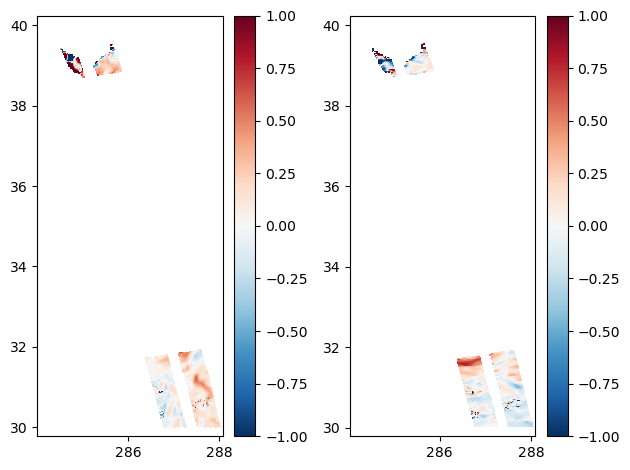

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_tight_layout(True)
im1 = ax1.pcolor(.5*(lon[:,1:] + lon[:,:-1]), 
                 .5*(lat[:,1:] + lat[:,:-1]), 
                 v, vmax=1., vmin=-1., cmap='RdBu_r'
                )
im2 = ax2.pcolor(.5*(lon[1:] + lon[:-1]), 
                 .5*(lat[1:] + lat[:-1]),  
                 u, vmax=1., vmin=-1., cmap='RdBu_r'
                )

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)

In [36]:
u_x = np.diff(u,axis=1) / (.5*(dx[1:] + dx[:-1]))
v_y = np.diff(v,axis=0) / (.5*(dy[:,1:] + dy[:,:-1]))
u_x = .25*(u_x[:-1,:-1] + u_x[1:,:-1] + u_x[1:,1:] + u_x[:-1,1:])
v_y = .25*(v_y[:-1,:-1] + v_y[1:,:-1] + v_y[1:,1:] + v_y[:-1,1:])

In [35]:
u_y = (np.diff(u,axis=0) / (.5*(dy[1:] + dy[:-1])))[:,1:-1]
v_x = (np.diff(v,axis=1) / (.5*(dx[:,1:] + dx[:,:-1])))[1:-1]
vort = v_x - u_y

In [37]:
sn = u_x - v_y
ss = v_x + u_y
strain = np.sqrt(sn**2 + ss**2)

In [28]:
vort.shape, cori.shape, lon.shape, lat.shape

((590, 178), (592, 180), (592, 180), (592, 180))

/tmp/ipykernel_329564/2372256645.py:3: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im1 = ax1.pcolor(lon[1:-1,1:-1],
/tmp/ipykernel_329564/2372256645.py:7: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im2 = ax2.pcolor(lon[1:-1,1:-1],
/tmp/ipykernel_329564/2372256645.py:12: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, ax=ax1)
/tmp/ipykernel_329564/2372256645.py:13: MatplotlibDeprecationWarning: Getting the array from 

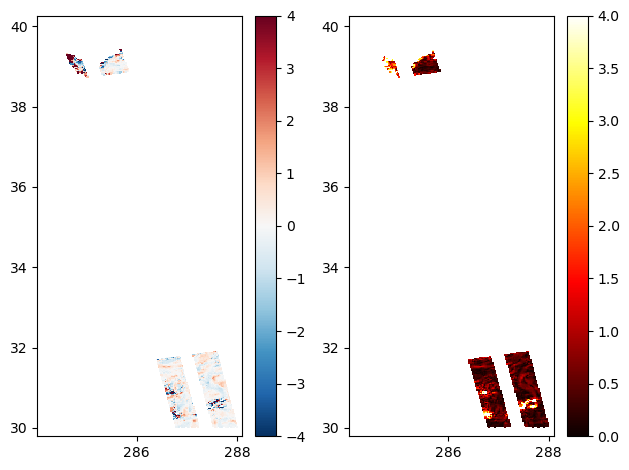

In [40]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_tight_layout(True)
im1 = ax1.pcolor(lon[1:-1,1:-1], 
                 lat[1:-1,1:-1], 
                 vort/cori[1:-1,1:-1], vmax=4., vmin=-4., cmap='RdBu_r'
                )
im2 = ax2.pcolor(lon[1:-1,1:-1], 
                 lat[1:-1,1:-1],  
                 strain/cori[1:-1,1:-1], vmax=4., vmin=0, cmap='hot'
                )

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)